In [29]:
import pandas as pd
df = pd.read_excel('df2_data.xlsx')
df.to_csv('df2_data.csv', index=False)


In [30]:
import pandas as pd
df = pd.read_csv('df2_data.csv')
df.head()


,Age at presentation (in yrs),Age at last follow up,Sex (m/f),Religion,Max education attained,Rural/Urban,Distance from LGBRIMH (in KM),Socioeconomic status,Age at onset(in years),Time period between onset to first consultation at LGBRIMH (DUI) (in days),...,anxious,hallucination,depressed,seizure,adhd,depression1,School Adjustment,"If yes, after how many days from first presentation diagnosis changed (in days)",Continued medication 1/stopped/changed,depression2
0,8.0,10.0,0,0.000000,0.0,0.5,62.0,0.00,8.0,150,...,0,0,0,1,0,0,0.00,0,4,0
1,17.0,18.0,0,0.000000,0.4,0.5,55.0,0.00,17.0,3,...,0,0,0,1,0,0,0.66,0,4,0
2,7.0,17.0,1,0.000000,0.0,0.5,102.0,0.00,5.5,0,...,0,0,0,1,0,0,0.00,0,3,0
3,10.0,10.0,1,0.333333,0.4,0.5,29.0,0.33,0.0,10,...,0,0,0,0,1,0,1.00,0,4,0
4,8.0,15.0,0,0.000000,0.0,0.5,102.0,0.33,5.5,912,...,0,0,0,1,0,0,0.00,0,3,0


In [31]:
df4 = df

In [32]:
import pandas as pd

sorted_df = pd.read_excel('rank2.xlsx')
selected_features = sorted_df['Column Name'].tolist()[:30]
df4= df4[selected_features]


In [33]:
df4['Final'] = df['Final']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8180\4197094083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Final'] = df['Final']


In [34]:
df4

,maximum period of compliance at lgb (in days) (longest streak of good compliance),total number of follow up at LGBRIMH,Maximum duration of symptom free period (in days),days/freq,total duration of medication treatment at LGB(in days) (from first consultation to last follow-up),Off-medications duration (to add all such durations over follow-up in days),Total duration of medication 2(in days),mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups),Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken divided by summation of total number of days when medications were taken with total off medication period),Total duration of medication 1 (in days),...,outbursts,Continued medication 1/stopped/changed,Distance from LGBRIMH (in KM),Follow up diagnosis changed or not (yes/no),Family environment,weight (in Kg),Time period between onset to first consultation at LGBRIMH (DUI) (in days),adhd,Response to medication 1 (Good/partial/no),Final
0,395.0,12,390,48.083333,626,22,240.0,1.66,0.96,350,...,0,4,62.0,0.5,0.0,20.0,150,0,0.00,1
1,240.0,4,270,886.750000,330,30,180.0,1.78,0.90,300,...,0,4,55.0,0.5,1.0,36.0,3,0,0.33,0
2,0.0,69,570,52.940299,1320,58,2686.0,0.00,0.00,3182,...,0,3,102.0,0.5,0.0,15.0,0,0,0.00,2
3,90.0,2,60,50.000000,90,20,0.0,1.00,0.30,90,...,0,4,29.0,0.5,0.5,35.0,10,1,0.00,2
4,480.0,71,480,54.342857,3495,65,1819.0,6.60,0.98,3495,...,0,3,102.0,0.5,0.0,21.0,912,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,648.0,10,648,61.600000,648,0,648.0,2.10,1.00,648,...,0,3,57.0,0.5,0.5,20.0,2555,1,0.33,2
144,113.0,5,228,102.400000,576,330,576.0,3.80,0.42,576,...,0,4,110.0,1.0,0.5,30.0,20,0,0.33,0
145,170.0,3,30,118.000000,384,180,70.0,4.30,1.00,384,...,0,4,326.0,0.5,0.5,48.0,75,0,0.33,0
146,390.0,24,530,39.545455,875,120,817.0,1.21,1.00,63,...,0,6,37.0,0.5,1.0,55.0,180,0,0.00,1


In [35]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)

explainer = shap.Explainer(rf_classifier, features)
shap_values = explainer.shap_values(features)
abs_shap_values = pd.DataFrame(abs(shap_values), columns=features.columns)
mean_abs_shap_values = abs_shap_values.mean()
ranked_features = mean_abs_shap_values.sort_values(ascending=False)

ranked_features_df = pd.DataFrame(ranked_features, columns=['SHAP Importance']).reset_index()
ranked_features_df.rename(columns={'index': 'Feature'}, inplace=True)

print("Ranked Features based on SHAP Importance:")
print(ranked_features_df)


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.090100, while the model output was 0.100000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [21]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)

explainer = shap.Explainer(rf_classifier, features)

shap_values = explainer.shap_values(features)

feature_importance_per_class = {class_label: {} for class_label in target.unique()}

for class_label in target.unique():
    class_indices = target[target == class_label].index
    for idx in class_indices:
        instance_shap_values = shap_values[idx]
        for feature, weight in zip(features.columns, instance_shap_values):
            if feature not in feature_importance_per_class[class_label]:
                feature_importance_per_class[class_label][feature] = []
            feature_importance_per_class[class_label][feature].append(weight)

average_feature_importance_per_class = {class_label: {feature: sum(weights) / len(weights) for feature, weights in importance.items()} for class_label, importance in feature_importance_per_class.items()}

top_features_per_class = {class_label: sorted(importance.keys(), key=lambda x: abs(importance[x]).mean(), reverse=True)[:30] for class_label, importance in average_feature_importance_per_class.items()}

for class_label, top_features in top_features_per_class.items():
    print(f"Top 30 features for class {class_label}: {top_features}")


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.169900, while the model output was 0.160000. If this difference is acceptable you can set check_additivity=False to disable this check.

Instance: 0
Original prediction probabilities: [0.7    0.1125 0.1875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.09853609 -0.024528   -0.07400809]
total number of follow up at LGBRIMH: [ 0.06907832 -0.02457082 -0.04450751]
Maximum duration of symptom free period (in days): [ 0.00194153  0.00487402 -0.00681555]
days/freq: [-0.00836253  0.00631407  0.00204846]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.05810381 -0.00936072 -0.04874309]
Off-medications duration (to add all such durations over follow-up in days): [-0.01212512 -0.01716389  0.02928901]
Total duration of medication 2(in days) : [ 0.02724215 -0.01376401 -0.01347815]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00344694  0.0009139   0.00253304]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

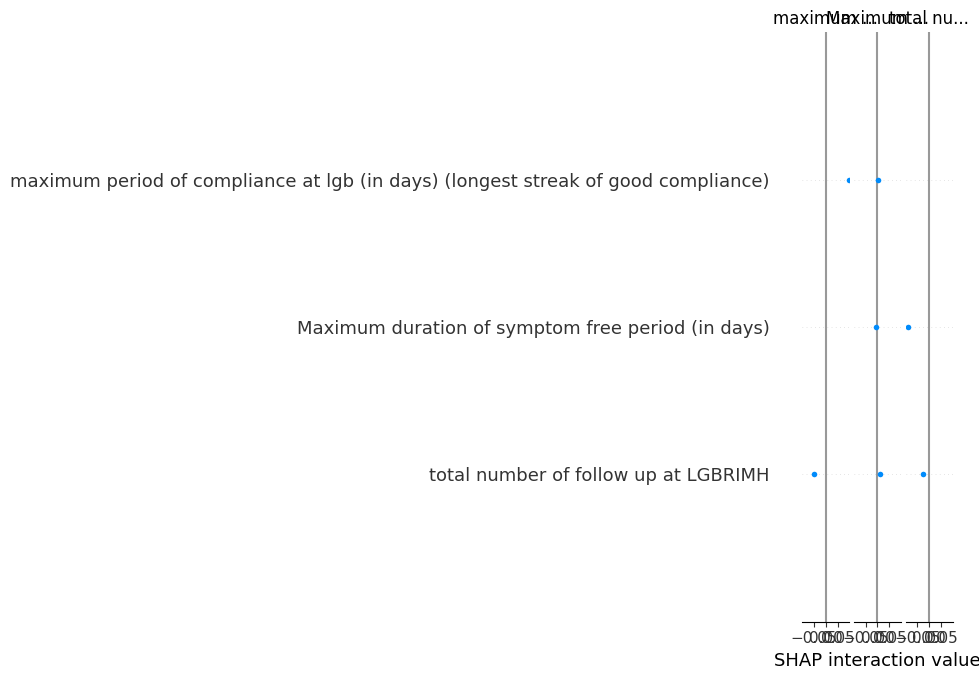



Instance: 1
Original prediction probabilities: [0.2375 0.15   0.6125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.0442526   0.01653489  0.0277177 ]
total number of follow up at LGBRIMH: [ 0.01805925 -0.01678233 -0.00127692]
Maximum duration of symptom free period (in days): [-0.00633931  0.00480631  0.001533  ]
days/freq: [-0.02072999  0.00447885  0.01625114]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.00035139  0.00639132 -0.00603993]
Off-medications duration (to add all such durations over follow-up in days): [-0.05142087 -0.01923352  0.07065439]
Total duration of medication 2(in days) : [-0.00503801  0.02325582 -0.01821781]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02444819 -0.00057543  0.02502361]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

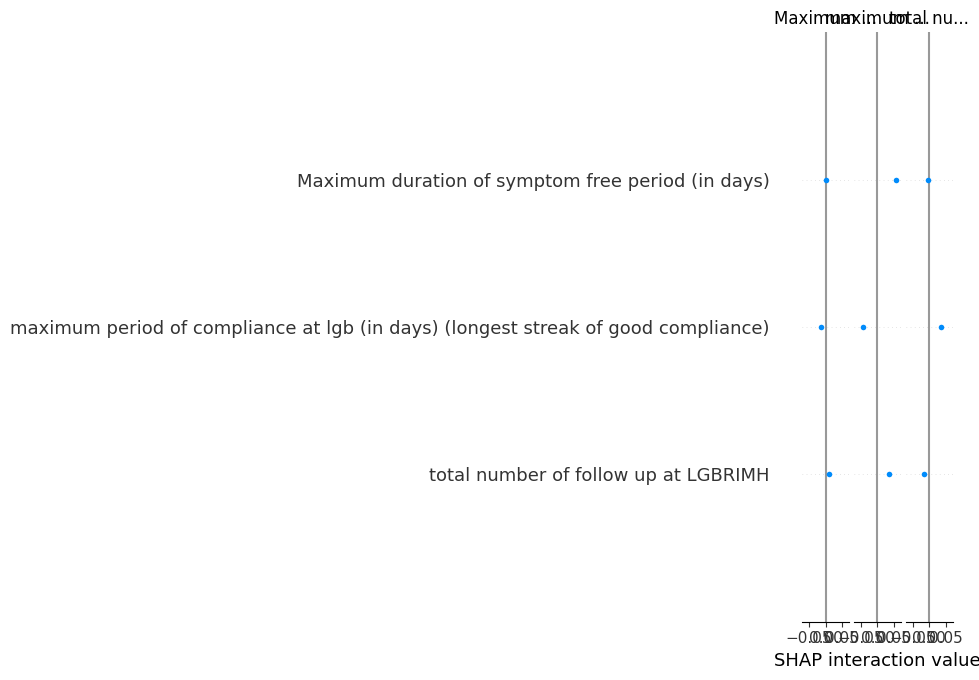



Instance: 2
Original prediction probabilities: [0.15   0.2125 0.6375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04673738  0.012869    0.03386838]
total number of follow up at LGBRIMH: [-0.03486062  0.01533083  0.0195298 ]
Maximum duration of symptom free period (in days): [ 0.01373188  0.00634645 -0.02007833]
days/freq: [-0.01621688  0.00013154  0.01608533]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01134262 -0.00942453  0.02076715]
Off-medications duration (to add all such durations over follow-up in days): [-0.05354877 -0.02234881  0.07589758]
Total duration of medication 2(in days) : [ 0.00296436  0.00329703 -0.0062614 ]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02949728  0.00483931  0.02465797]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


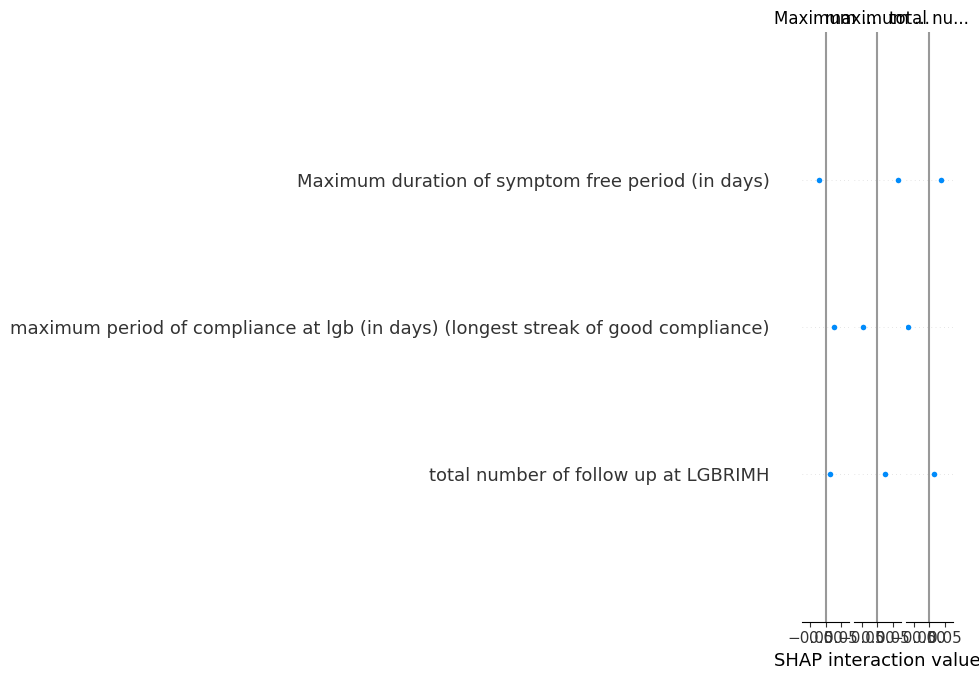



Instance: 3
Original prediction probabilities: [0.025 0.25  0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02925602 -0.00336109  0.03261711]
total number of follow up at LGBRIMH: [-0.04747544  0.01706939  0.03040605]
Maximum duration of symptom free period (in days): [-0.03302418  0.01550037  0.0175238 ]
days/freq: [-0.02413185 -0.00092924  0.02506109]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02430861  0.00730619  0.01700242]
Off-medications duration (to add all such durations over follow-up in days): [-0.03539338 -0.02461503  0.06000841]
Total duration of medication 2(in days) : [ 0.0047749  -0.00054321 -0.00423169]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01178806 -0.00505857  0.01684663]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

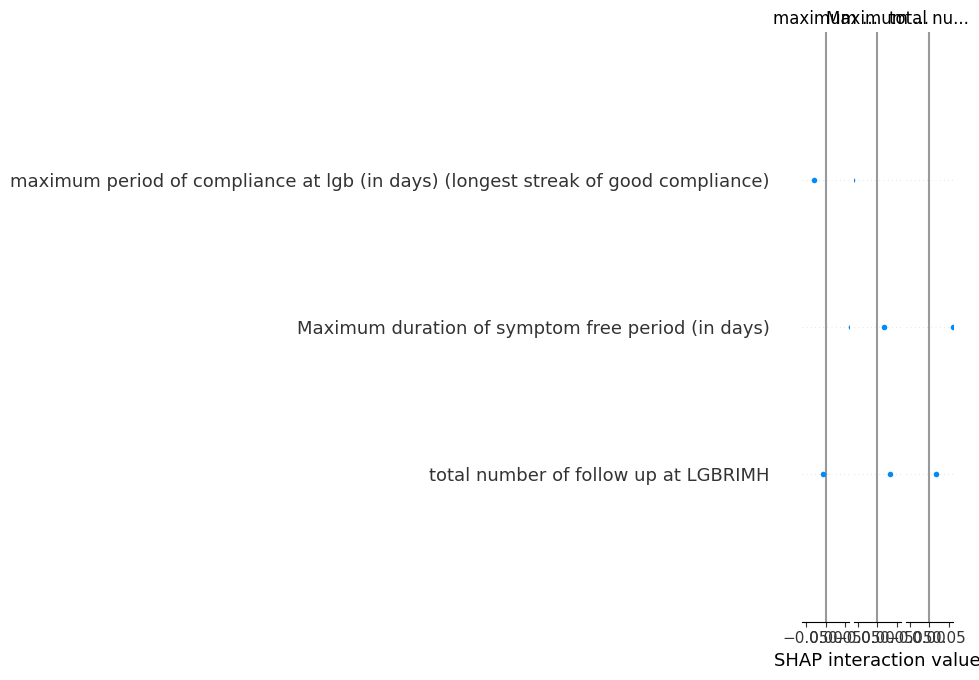



Instance: 4
Original prediction probabilities: [0.3875 0.25   0.3625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.08148727  0.0346537   0.04683357]
total number of follow up at LGBRIMH: [-0.009592    0.00564338  0.00394862]
Maximum duration of symptom free period (in days): [ 0.07750628 -0.01944485 -0.05806143]
days/freq: [ 0.00938742 -0.00210597 -0.00728145]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02130069  0.02042471  0.00087598]
Off-medications duration (to add all such durations over follow-up in days): [-0.03343662 -0.0206673   0.05410393]
Total duration of medication 2(in days) : [-0.03425998  0.00661998  0.02764   ]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05076777 -0.010746   -0.04002177]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

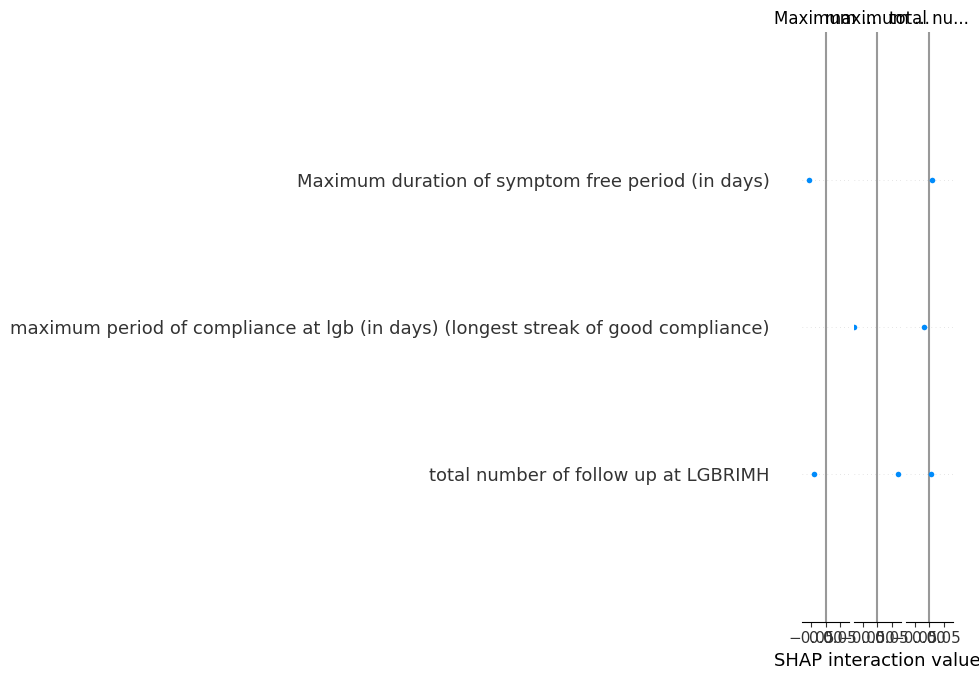



Instance: 5
Original prediction probabilities: [0.8    0.1125 0.0875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.09966419 -0.0241406  -0.07552359]
total number of follow up at LGBRIMH: [ 0.0737134  -0.02155911 -0.05215428]
Maximum duration of symptom free period (in days): [ 0.0929376  -0.03448056 -0.05845704]
days/freq: [-0.00112577  0.00597234 -0.00484658]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.09549979 -0.01886248 -0.07663731]
Off-medications duration (to add all such durations over follow-up in days): [-0.01192676 -0.01014728  0.02207404]
Total duration of medication 2(in days) : [ 0.00986352 -0.00358715 -0.00627637]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02347865  0.02319973  0.00027892]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

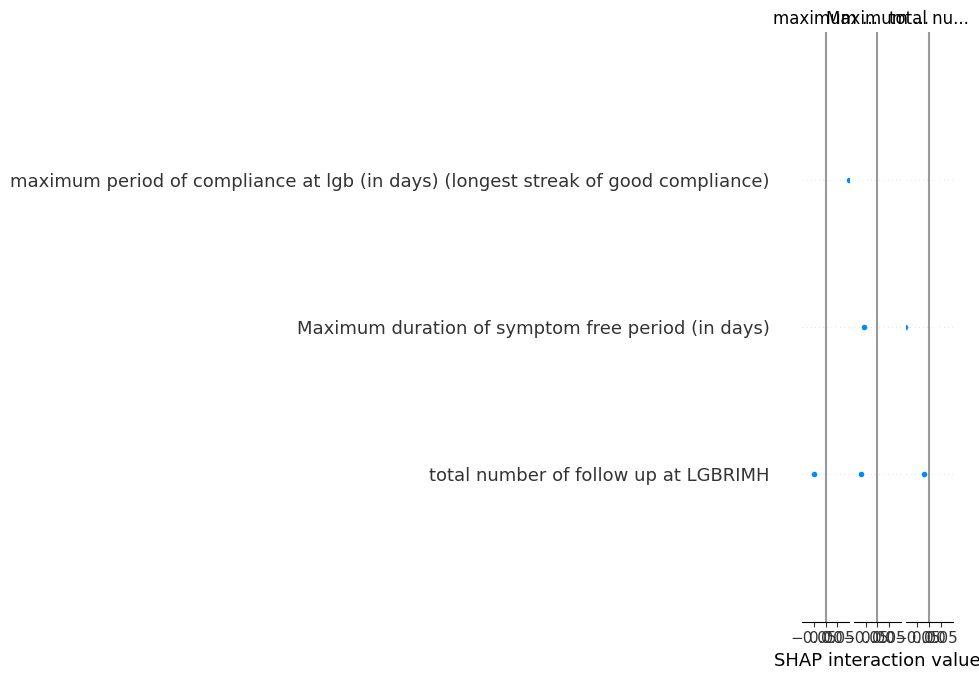



Instance: 6
Original prediction probabilities: [0.05  0.225 0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02990238 -0.02050369  0.05040607]
total number of follow up at LGBRIMH: [-0.05518408  0.00927035  0.04591373]
Maximum duration of symptom free period (in days): [-0.03185361  0.01811011  0.0137435 ]
days/freq: [-0.00891095  0.00423945  0.0046715 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02331204  0.00910921  0.01420282]
Off-medications duration (to add all such durations over follow-up in days): [-0.01850809 -0.03659175  0.05509983]
Total duration of medication 2(in days) : [-0.02295843  0.02435502 -0.00139659]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.0049072   0.00594146 -0.00103426]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

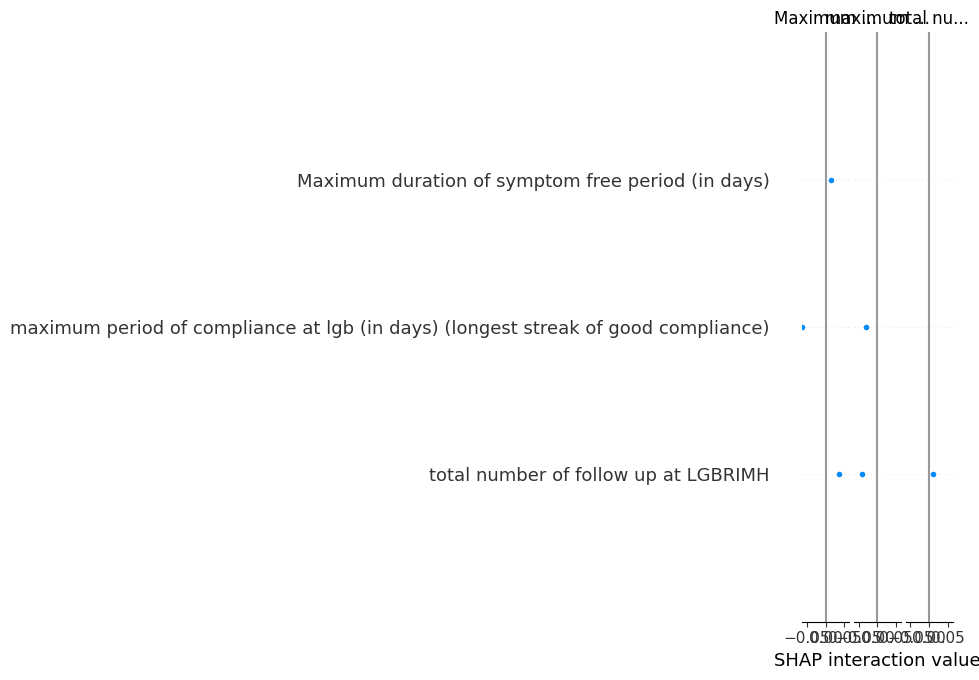



Instance: 7
Original prediction probabilities: [0.5    0.3625 0.1375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.01168638  0.01541002 -0.00372364]
total number of follow up at LGBRIMH: [-0.04822495  0.0336279   0.01459704]
Maximum duration of symptom free period (in days): [-0.02683505  0.01710751  0.00972754]
days/freq: [ 0.02243674  0.0063998  -0.02883654]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02906922  0.01117408  0.01789514]
Off-medications duration (to add all such durations over follow-up in days): [ 0.12283044  0.01623379 -0.13906423]
Total duration of medication 2(in days) : [ 0.00034302  0.00131904 -0.00166206]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.02465778 -0.00528913 -0.01936865]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

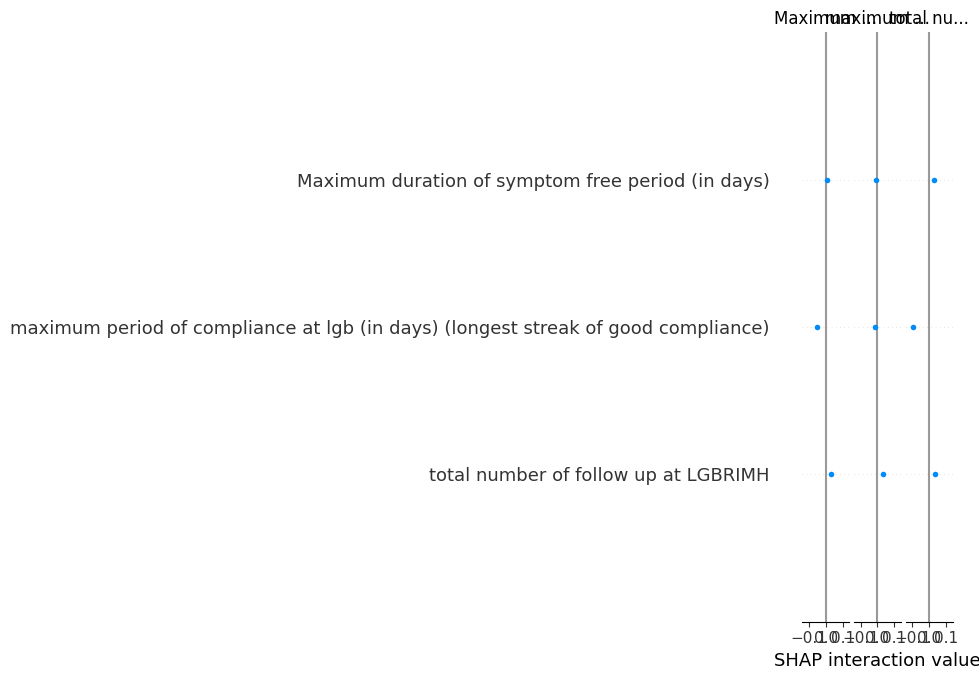



Instance: 8
Original prediction probabilities: [0.275 0.45  0.275]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02524651  0.03153061 -0.00628411]
total number of follow up at LGBRIMH: [-0.00566573  0.00402741  0.00163832]
Maximum duration of symptom free period (in days): [-0.04634735  0.03029693  0.01605042]
days/freq: [ 0.03251047 -0.00225069 -0.03025978]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01655464  0.00933315  0.0072215 ]
Off-medications duration (to add all such durations over follow-up in days): [-0.04748818  0.01869366  0.02879452]
Total duration of medication 2(in days) : [ 0.00098553  0.00339176 -0.00437729]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.00255722  0.01463267 -0.01718989]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


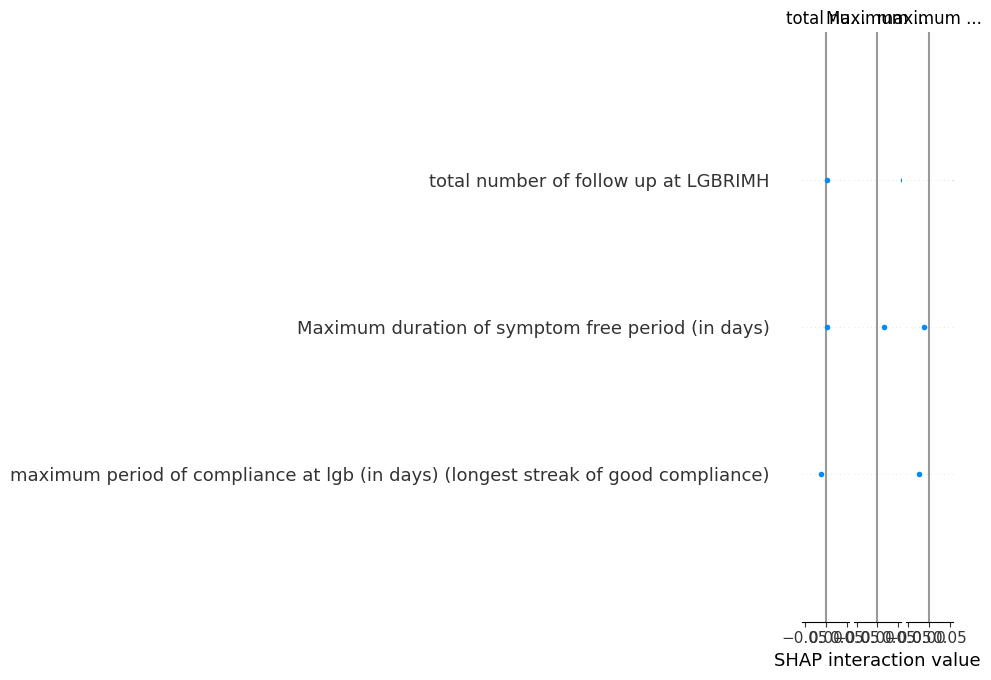



Instance: 9
Original prediction probabilities: [0.575  0.2375 0.1875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.0639224  -0.02230711 -0.0416153 ]
total number of follow up at LGBRIMH: [ 0.06195645 -0.02009523 -0.04186122]
Maximum duration of symptom free period (in days): [ 0.01610157 -0.00145197 -0.0146496 ]
days/freq: [-0.00615553 -0.00021241  0.00636795]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.00741536  0.00172521 -0.00914056]
Off-medications duration (to add all such durations over follow-up in days): [ 0.00663423  0.01162374 -0.01825797]
Total duration of medication 2(in days) : [ 0.0235242  -0.00912066 -0.01440354]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.02382973 -0.01704955 -0.00678018]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

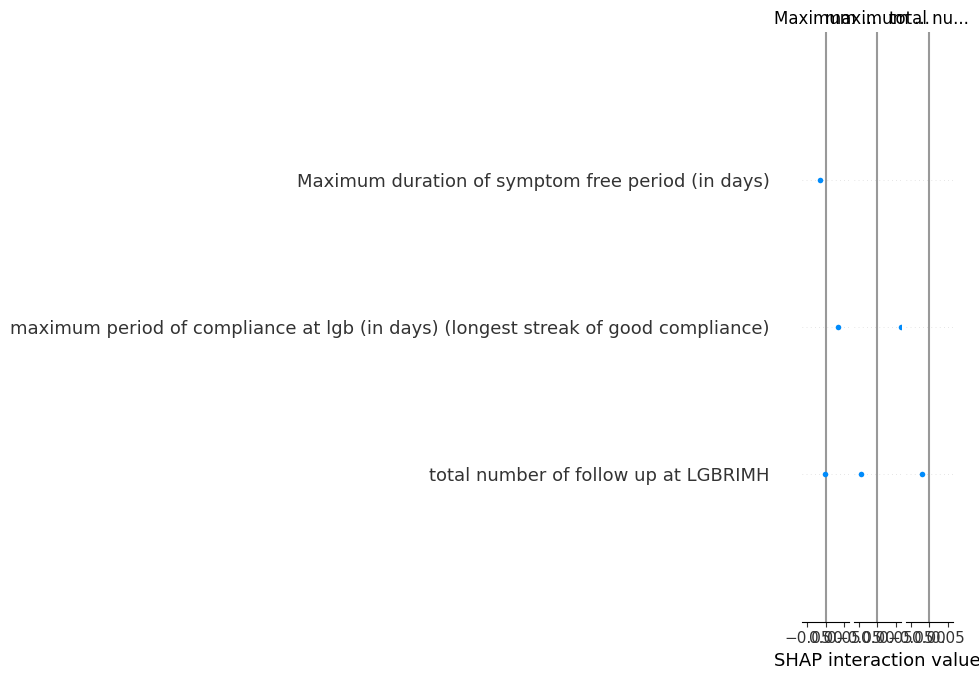



Instance: 10
Original prediction probabilities: [0.075 0.2   0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04991326 -0.00706873  0.05698199]
total number of follow up at LGBRIMH: [-0.06291632  0.00543622  0.0574801 ]
Maximum duration of symptom free period (in days): [-0.03826793  0.01662859  0.02163934]
days/freq: [-0.01664734 -0.0056839   0.02233124]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03079381  0.00732977  0.02346403]
Off-medications duration (to add all such durations over follow-up in days): [-0.03547299 -0.05203857  0.08751156]
Total duration of medication 2(in days) : [ 0.01128396  0.0046829  -0.01596685]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00730505 -0.00178599  0.00909104]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

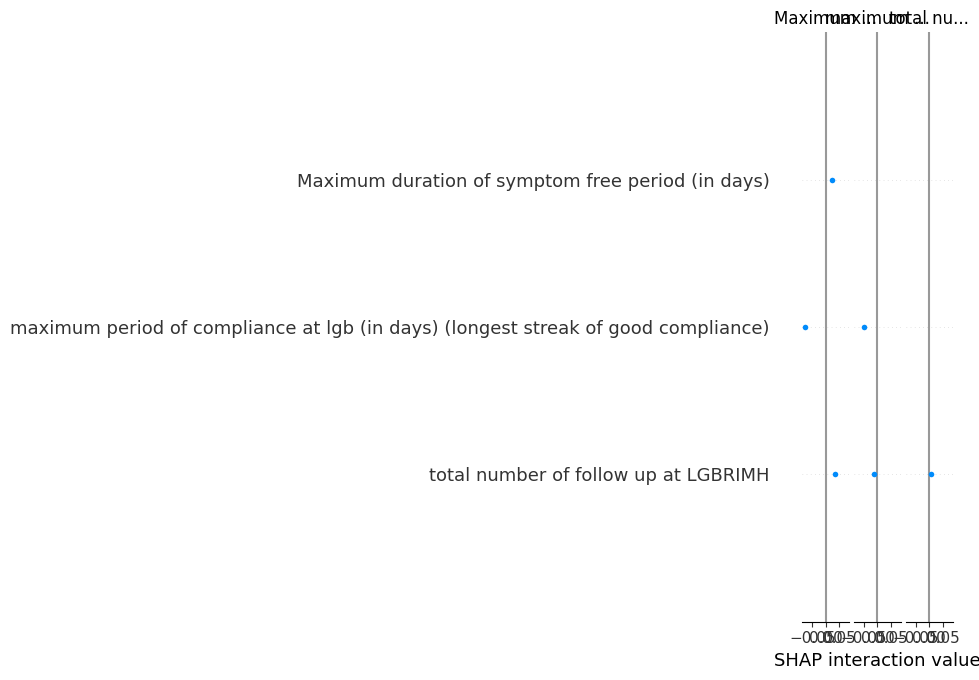



Instance: 11
Original prediction probabilities: [0.5125 0.2    0.2875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.07182556 -0.0417933  -0.03003226]
total number of follow up at LGBRIMH: [ 0.01353117 -0.00937151 -0.00415967]
Maximum duration of symptom free period (in days): [ 0.0845944  -0.03533091 -0.04926349]
days/freq: [ 0.00901506 -0.00012091 -0.00889415]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03364765  0.01120289  0.02244476]
Off-medications duration (to add all such durations over follow-up in days): [-0.02399558 -0.00881593  0.03281151]
Total duration of medication 2(in days) : [ 0.0157896  -0.01449344 -0.00129616]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05206902 -0.01678631 -0.03528271]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

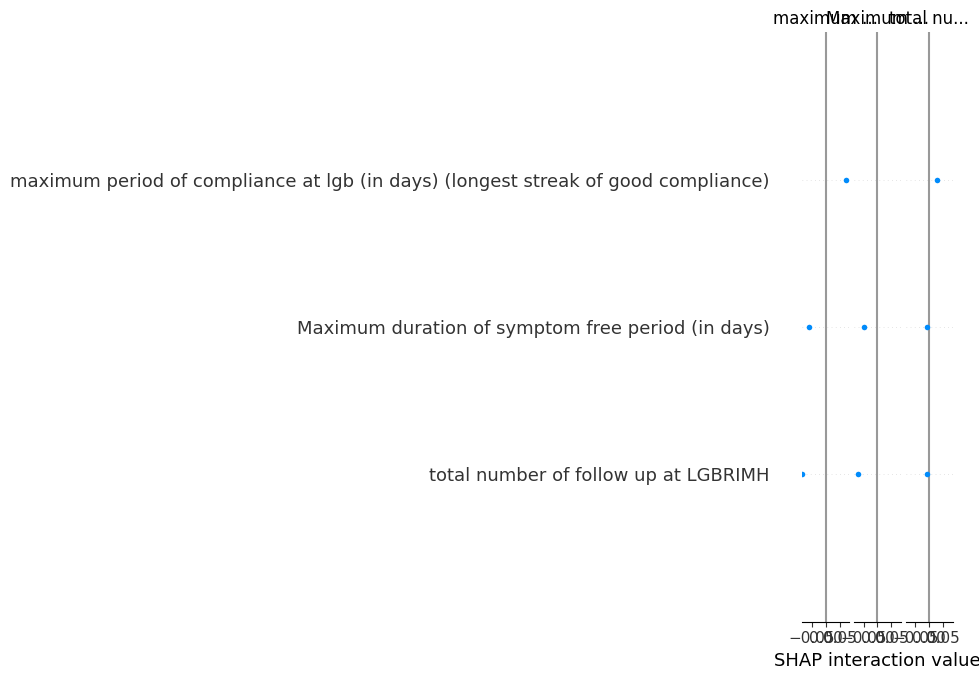



Instance: 12
Original prediction probabilities: [0.75   0.1625 0.0875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.05174475 -0.01659476 -0.03514999]
total number of follow up at LGBRIMH: [ 0.06212957 -0.0327744  -0.02935517]
Maximum duration of symptom free period (in days): [-0.00170742 -0.00353401  0.00524143]
days/freq: [ 0.02378339 -0.01501258 -0.00877082]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01219828  0.00399084  0.00820744]
Off-medications duration (to add all such durations over follow-up in days): [ 0.07906322  0.03131495 -0.11037818]
Total duration of medication 2(in days) : [-0.00057251  0.01182699 -0.01125448]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05564063 -0.02589881 -0.02974182]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

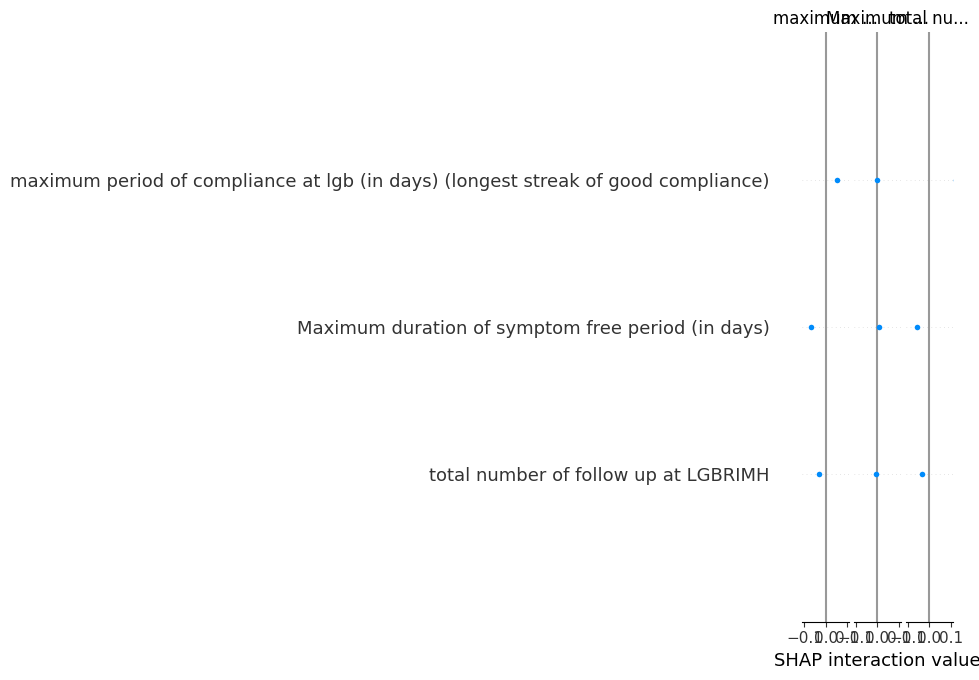



Instance: 13
Original prediction probabilities: [0.225 0.5   0.275]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02277382  0.03131038 -0.00853656]
total number of follow up at LGBRIMH: [-0.0115399   0.01543236 -0.00389246]
Maximum duration of symptom free period (in days): [ 0.00355549  0.0084451  -0.0120006 ]
days/freq: [ 0.05519811 -0.00752719 -0.04767092]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.00876853  0.01245755 -0.00368902]
Off-medications duration (to add all such durations over follow-up in days): [-0.04183039  0.02389458  0.01793581]
Total duration of medication 2(in days) : [-0.00290531  0.01388942 -0.01098411]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.03393888  0.0121852   0.02175368]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


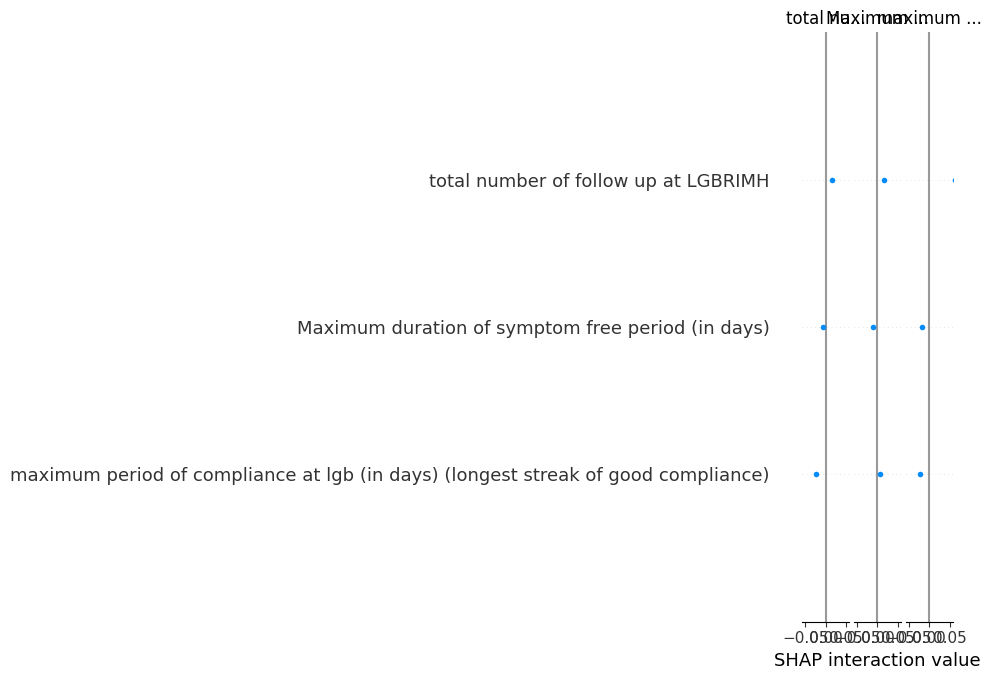



Instance: 14
Original prediction probabilities: [0.3    0.3875 0.3125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04469016  0.02682728  0.01786288]
total number of follow up at LGBRIMH: [ 0.02436607 -0.0020712  -0.02229487]
Maximum duration of symptom free period (in days): [ 0.07265199 -0.03407712 -0.03857487]
days/freq: [ 0.03804547 -0.00426959 -0.03377588]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03038727  0.00556739  0.02481988]
Off-medications duration (to add all such durations over follow-up in days): [-0.0404917   0.00118749  0.0393042 ]
Total duration of medication 2(in days) : [ 0.00941097  0.00127236 -0.01068332]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05326454 -0.02949559 -0.02376894]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

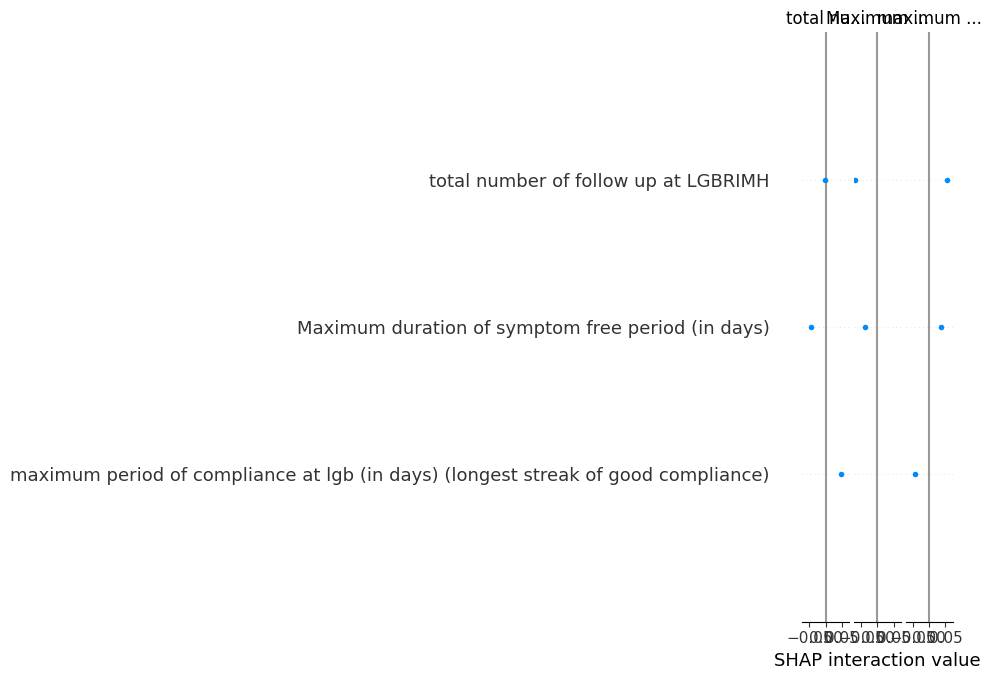



Instance: 15
Original prediction probabilities: [0.4625 0.2625 0.275 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03128301  0.01533056  0.01595245]
total number of follow up at LGBRIMH: [-0.02179586  0.01083808  0.01095779]
Maximum duration of symptom free period (in days): [ 0.05285293 -0.03970289 -0.01315004]
days/freq: [ 0.04135842 -0.01343194 -0.02792648]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01889358  0.01648338  0.0024102 ]
Off-medications duration (to add all such durations over follow-up in days): [ 0.0854002   0.01059411 -0.09599431]
Total duration of medication 2(in days) : [-0.00877359  0.00659103  0.00218256]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.0318896  -0.01794075 -0.01394884]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


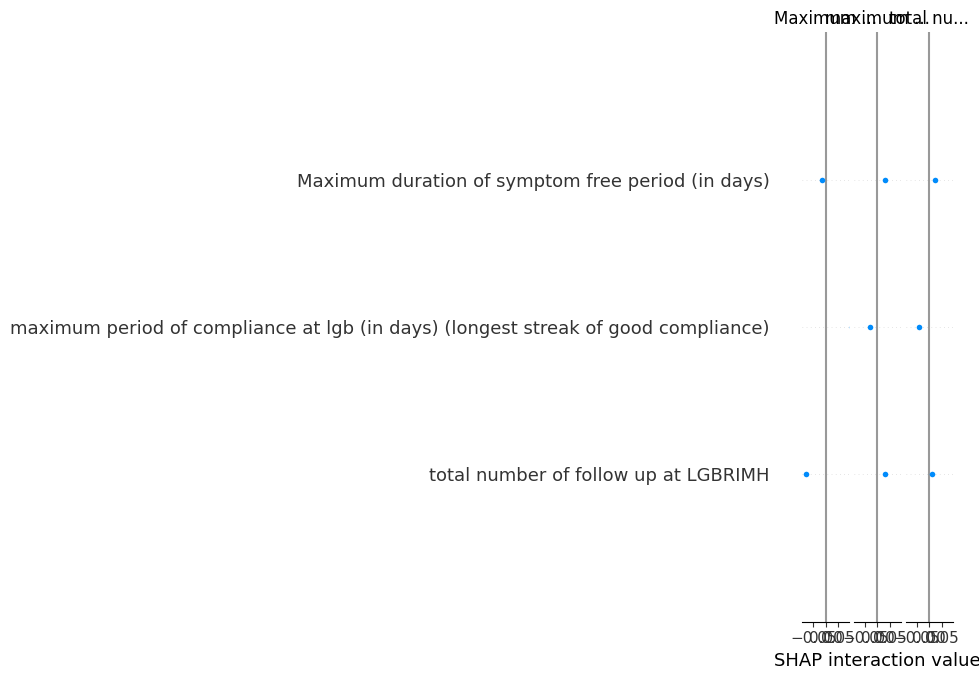



Instance: 16
Original prediction probabilities: [0.0375 0.1375 0.825 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04132702 -0.00341466  0.04474168]
total number of follow up at LGBRIMH: [-0.06800473  0.0149276   0.05307713]
Maximum duration of symptom free period (in days): [-0.03580148  0.01352193  0.02227955]
days/freq: [-0.01036071  0.01214057 -0.00177986]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02055486  0.00243629  0.01811857]
Off-medications duration (to add all such durations over follow-up in days): [-0.03239283 -0.05265431  0.08504715]
Total duration of medication 2(in days) : [ 0.0087764  -0.0027153  -0.00606109]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01797112 -0.00765525  0.02562637]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

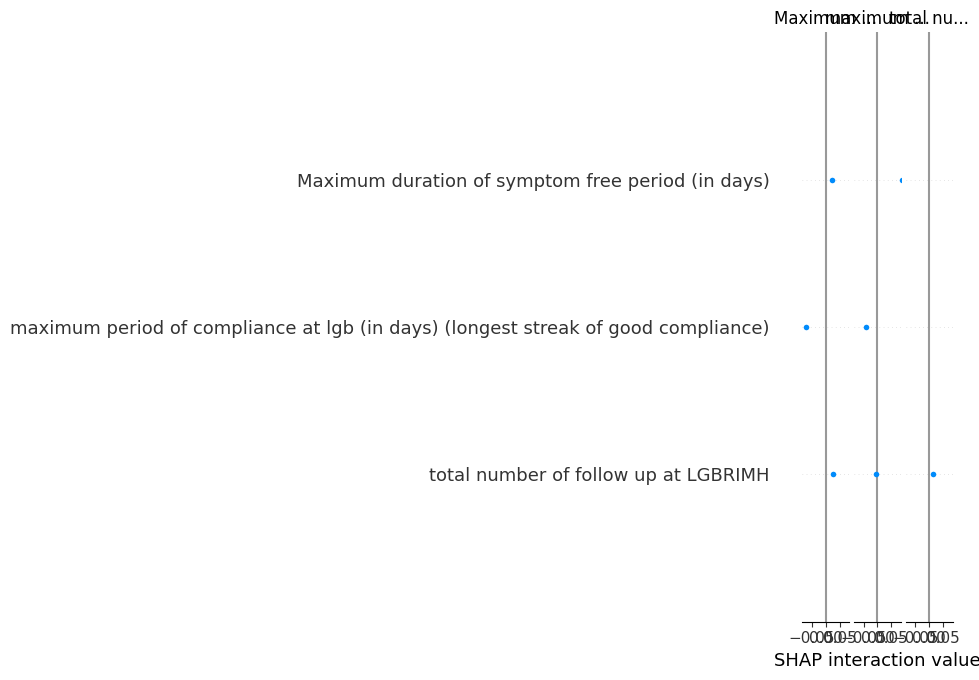



Instance: 17
Original prediction probabilities: [0.1   0.475 0.425]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02992953  0.00623535  0.02369418]
total number of follow up at LGBRIMH: [-0.05250694  0.02099355  0.0315134 ]
Maximum duration of symptom free period (in days): [-0.03944462  0.02597765  0.01346697]
days/freq: [ 0.02251473  0.00327393 -0.02578866]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02889522  0.00897118  0.01992404]
Off-medications duration (to add all such durations over follow-up in days): [-0.04266713 -0.02599842  0.06866556]
Total duration of medication 2(in days) : [-0.00677722  0.00835405 -0.00157684]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01561345 -0.00445729  0.02007075]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

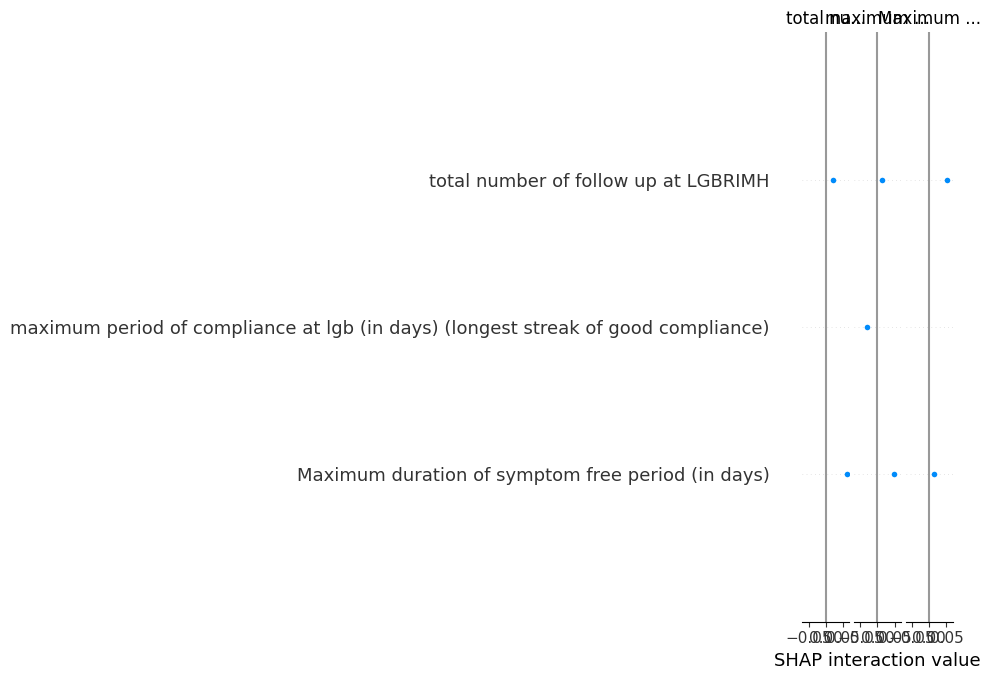



Instance: 18
Original prediction probabilities: [0.2625 0.3375 0.4   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03829566  0.01896042  0.01933524]
total number of follow up at LGBRIMH: [-0.037533    0.00486908  0.03266392]
Maximum duration of symptom free period (in days): [-0.04468321  0.02172981  0.0229534 ]
days/freq: [-0.02137344 -0.00332963  0.02470306]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02647322  0.00017056  0.02630266]
Off-medications duration (to add all such durations over follow-up in days): [ 0.07248351  0.06941792 -0.14190143]
Total duration of medication 2(in days) : [-0.04602265  0.04285413  0.00316852]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00028597 -0.00629488  0.00658085]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

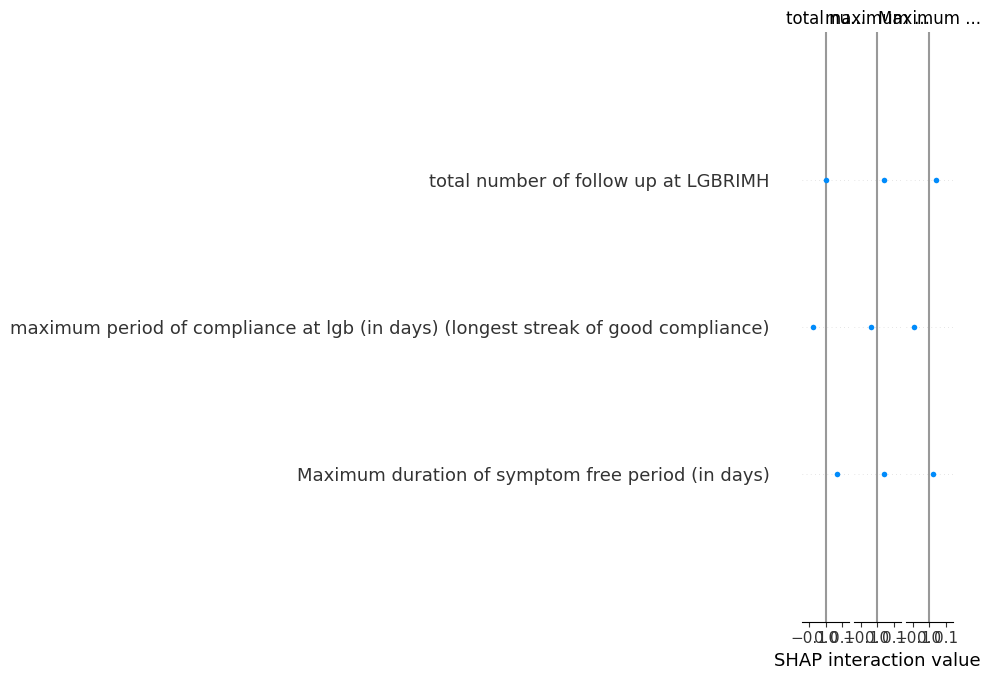



Instance: 19
Original prediction probabilities: [0.4375 0.2875 0.275 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.01562015  0.00298123 -0.01860138]
total number of follow up at LGBRIMH: [ 0.05708446 -0.01913279 -0.03795166]
Maximum duration of symptom free period (in days): [-0.05307416  0.01572661  0.03734755]
days/freq: [ 0.00255924  0.00189534 -0.00445458]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.00093877  0.00700147 -0.00794024]
Off-medications duration (to add all such durations over follow-up in days): [-0.0354408  -0.01140345  0.04684425]
Total duration of medication 2(in days) : [ 0.00725798  0.02033777 -0.02759575]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.00087761 -0.003858    0.00298038]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

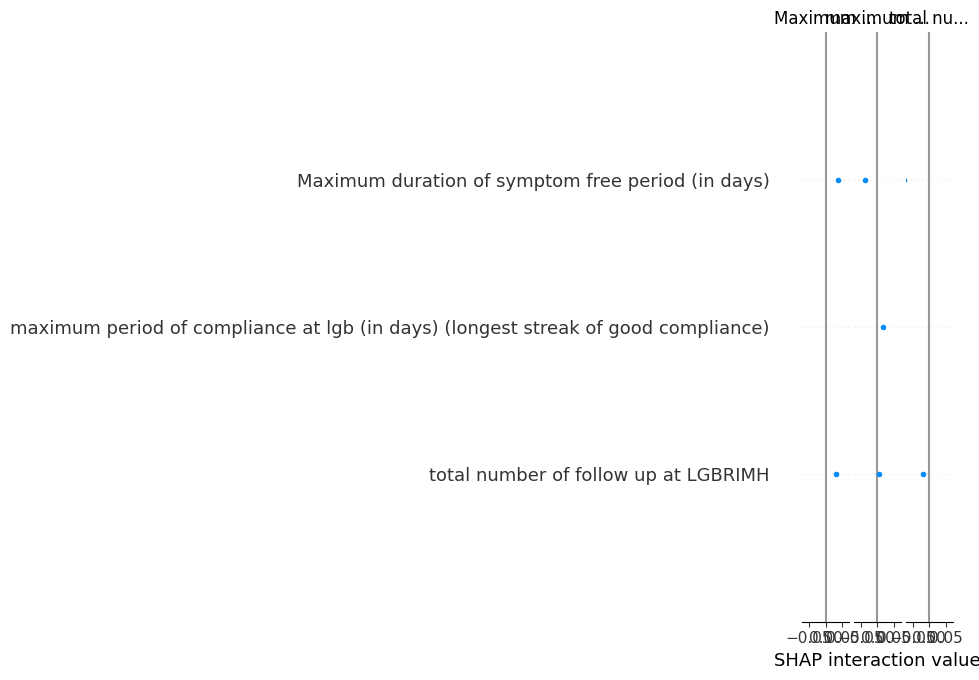



Instance: 20
Original prediction probabilities: [0.1125 0.55   0.3375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03522195  0.00927723  0.02594472]
total number of follow up at LGBRIMH: [-0.06293921  0.02934824  0.03359097]
Maximum duration of symptom free period (in days): [-0.04349874  0.0311367   0.01236203]
days/freq: [-0.02446767  0.00540587  0.0190618 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03393928  0.0173164   0.01662288]
Off-medications duration (to add all such durations over follow-up in days): [ 0.05625525  0.10575509 -0.16201034]
Total duration of medication 2(in days) : [-0.04730944  0.06131789 -0.01400846]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00508209 -0.00407593  0.00915802]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

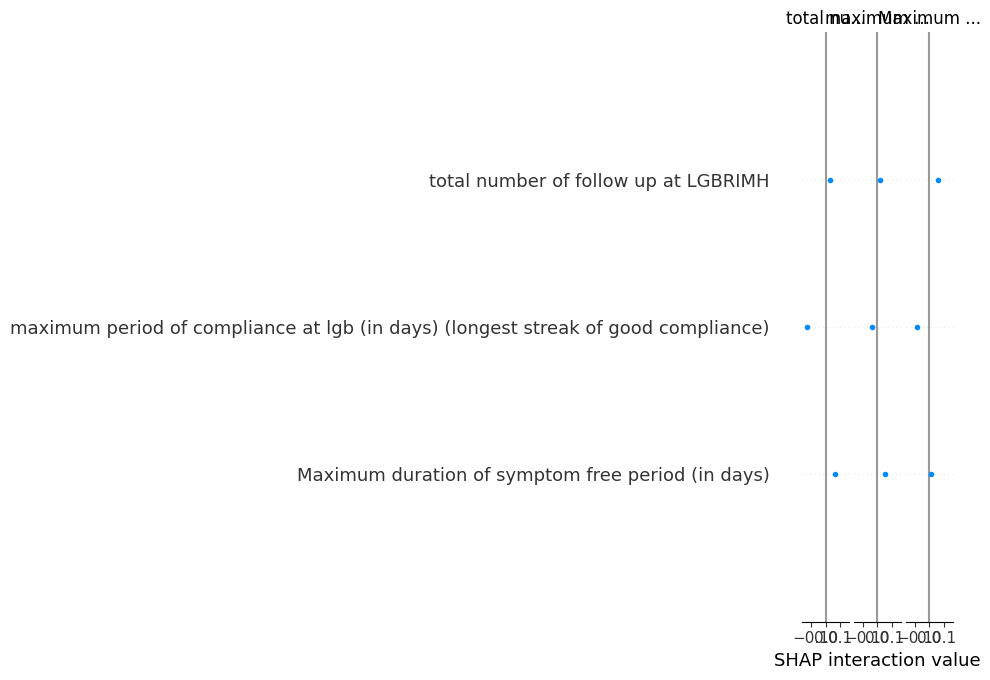



Instance: 21
Original prediction probabilities: [0.325  0.4125 0.2625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03577297  0.02328827  0.01248471]
total number of follow up at LGBRIMH: [-0.03902669  0.02132088  0.01770581]
Maximum duration of symptom free period (in days): [-0.03708999  0.04132114 -0.00423115]
days/freq: [-0.03521976  0.02268585  0.01253391]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02383838  0.00896156  0.01487682]
Off-medications duration (to add all such durations over follow-up in days): [ 0.10510107  0.05561225 -0.16071332]
Total duration of medication 2(in days) : [ 0.00128415  0.00227594 -0.00356009]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00111296 -0.00480624  0.0059192 ]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

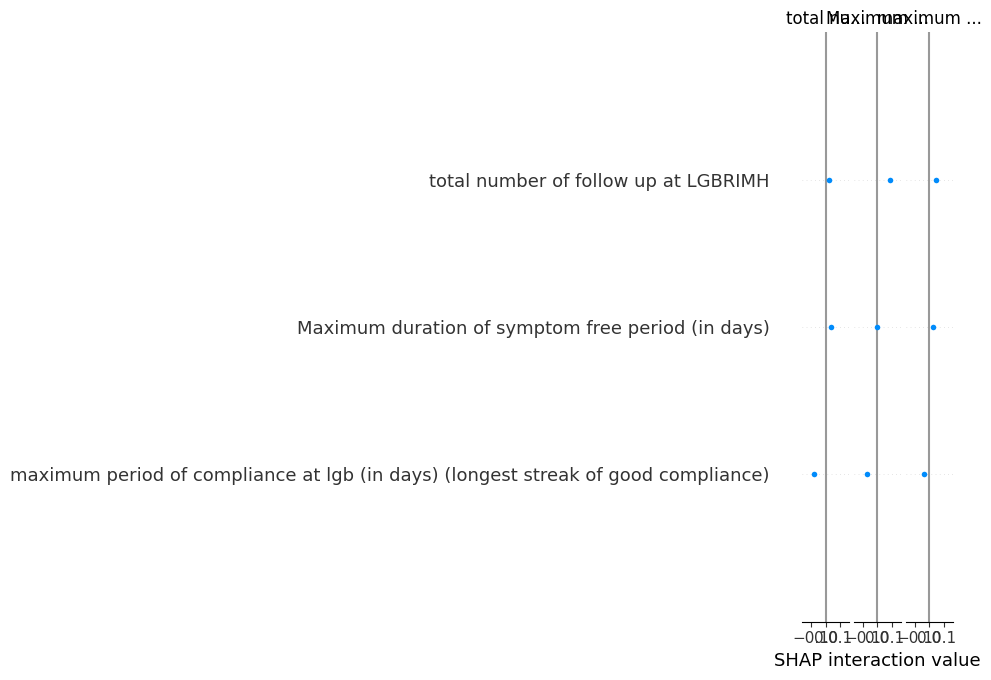



Instance: 22
Original prediction probabilities: [0.7125 0.1875 0.1   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.03960028  0.00793307 -0.04753336]
total number of follow up at LGBRIMH: [ 0.05278344 -0.02376504 -0.02901841]
Maximum duration of symptom free period (in days): [ 0.00958095 -0.01248202  0.00290107]
days/freq: [ 0.02440134 -0.00448409 -0.01991725]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.0393187  -0.02035185 -0.01896685]
Off-medications duration (to add all such durations over follow-up in days): [ 0.06806978  0.01635067 -0.08442045]
Total duration of medication 2(in days) : [ 0.00340267  0.00714228 -0.01054495]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.03127164 -0.01227668 -0.01899496]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


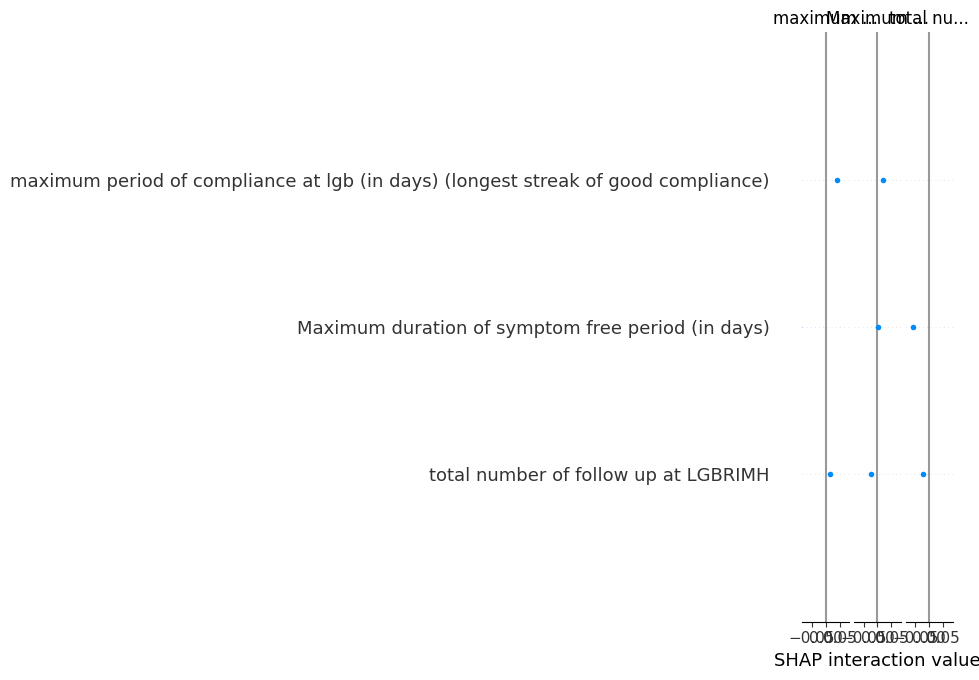



Instance: 23
Original prediction probabilities: [0.35 0.15 0.5 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03637921  0.00996361  0.0264156 ]
total number of follow up at LGBRIMH: [ 0.04202208 -0.02886101 -0.01316107]
Maximum duration of symptom free period (in days): [-0.04854761  0.01887036  0.02967726]
days/freq: [ 0.04113148 -0.01363479 -0.0274967 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01340568 -0.00059445  0.01400013]
Off-medications duration (to add all such durations over follow-up in days): [ 0.01314964  0.03514529 -0.04829492]
Total duration of medication 2(in days) : [-0.00143688  0.00671687 -0.00527999]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.04824991 -0.01648282 -0.03176709]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken div

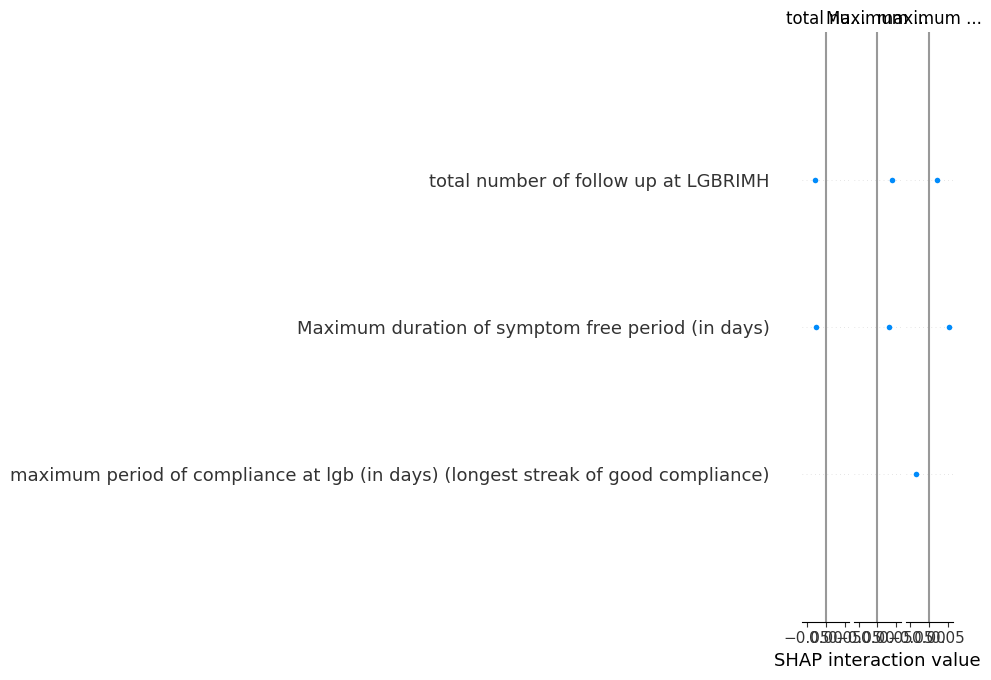



Instance: 24
Original prediction probabilities: [0.2125 0.325  0.4625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03462062 -0.00144358  0.0360642 ]
total number of follow up at LGBRIMH: [-0.04153484  0.01079504  0.0307398 ]
Maximum duration of symptom free period (in days): [-0.03972066  0.01686633  0.02285432]
days/freq: [-0.02218828  0.00715564  0.01503265]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02306609  0.00187612  0.02118997]
Off-medications duration (to add all such durations over follow-up in days): [ 0.00151566  0.03653169 -0.03804735]
Total duration of medication 2(in days) : [-0.02715057  0.02533194  0.00181863]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01388207  0.00368793  0.01019414]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


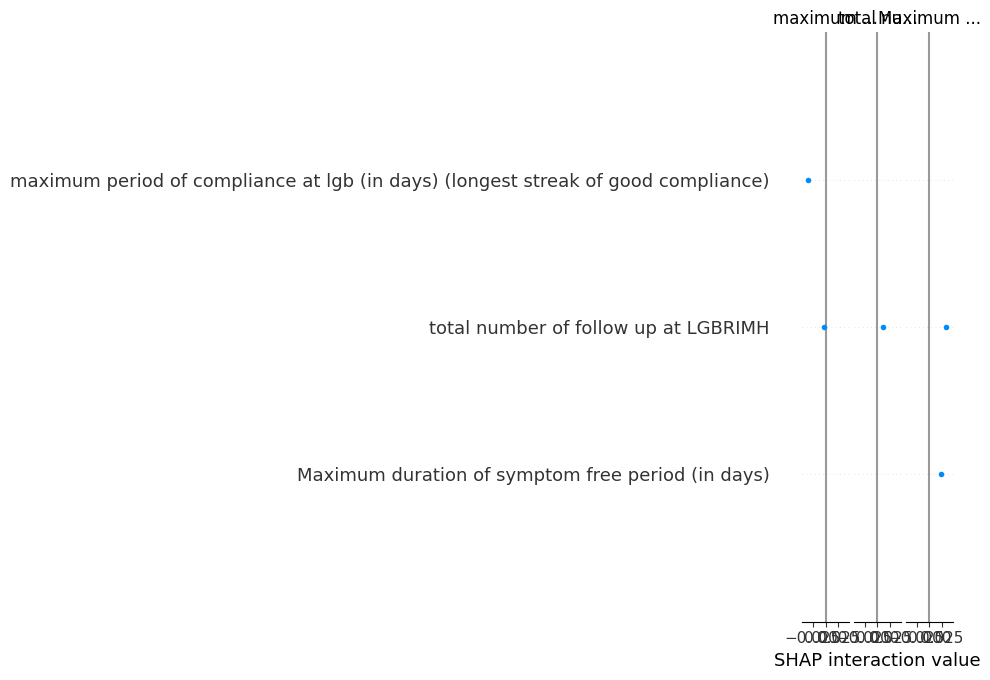



Instance: 25
Original prediction probabilities: [0.1875 0.325  0.4875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.01557663 -0.00069781 -0.01487882]
total number of follow up at LGBRIMH: [-0.04296435  0.00830726  0.03465709]
Maximum duration of symptom free period (in days): [-0.00291393  0.00026025  0.00265368]
days/freq: [-1.61103915e-02  6.83009510e-05  1.60420905e-02]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02933679  0.01038243  0.01895436]
Off-medications duration (to add all such durations over follow-up in days): [-0.00448602  0.03611206 -0.03162603]
Total duration of medication 2(in days) : [-0.03616225  0.02606638  0.01009587]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00235045  0.00406282 -0.00171237]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medicati

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


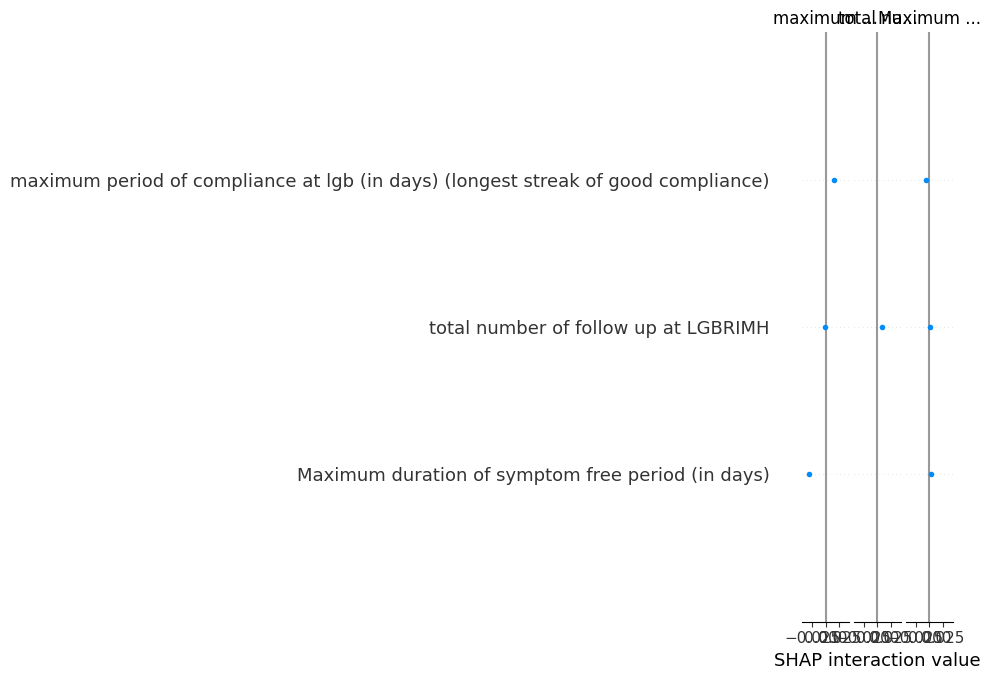



Instance: 26
Original prediction probabilities: [0.0375 0.0625 0.9   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03917717  0.00224884  0.03692833]
total number of follow up at LGBRIMH: [-0.04455837  0.01218077  0.0323776 ]
Maximum duration of symptom free period (in days): [-0.03784554  0.00301103  0.03483451]
days/freq: [-0.03296178  0.01346996  0.01949182]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02218697  0.00120979  0.02097718]
Off-medications duration (to add all such durations over follow-up in days): [-0.05057691 -0.0480271   0.098604  ]
Total duration of medication 2(in days) : [ 0.00540146 -0.00426087 -0.00114059]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02289359 -0.00280344  0.02569703]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

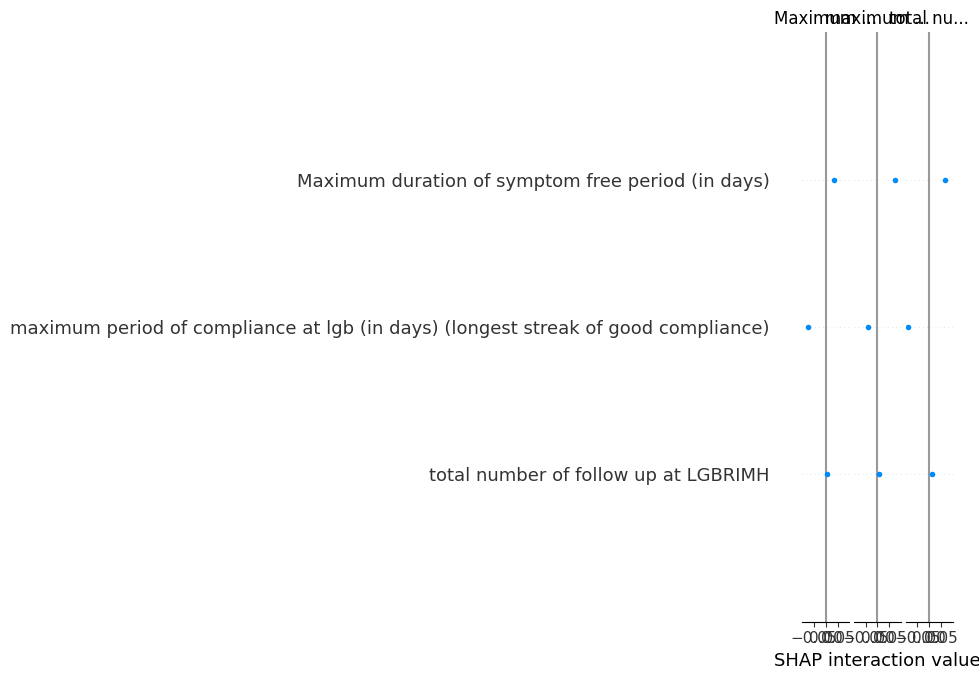



Instance: 27
Original prediction probabilities: [0.5625 0.125  0.3125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.08017917 -0.02948965 -0.05068951]
total number of follow up at LGBRIMH: [ 0.05086364 -0.01737754 -0.0334861 ]
Maximum duration of symptom free period (in days): [ 0.0564219  -0.00678006 -0.04964184]
days/freq: [-0.02899163  0.00870168  0.02028996]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01117204 -0.00421453  0.01538658]
Off-medications duration (to add all such durations over follow-up in days): [-0.01841807 -0.01968537  0.03810343]
Total duration of medication 2(in days) : [-0.00187937 -0.00947846  0.01135782]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01253236 -0.00280881  0.01534117]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

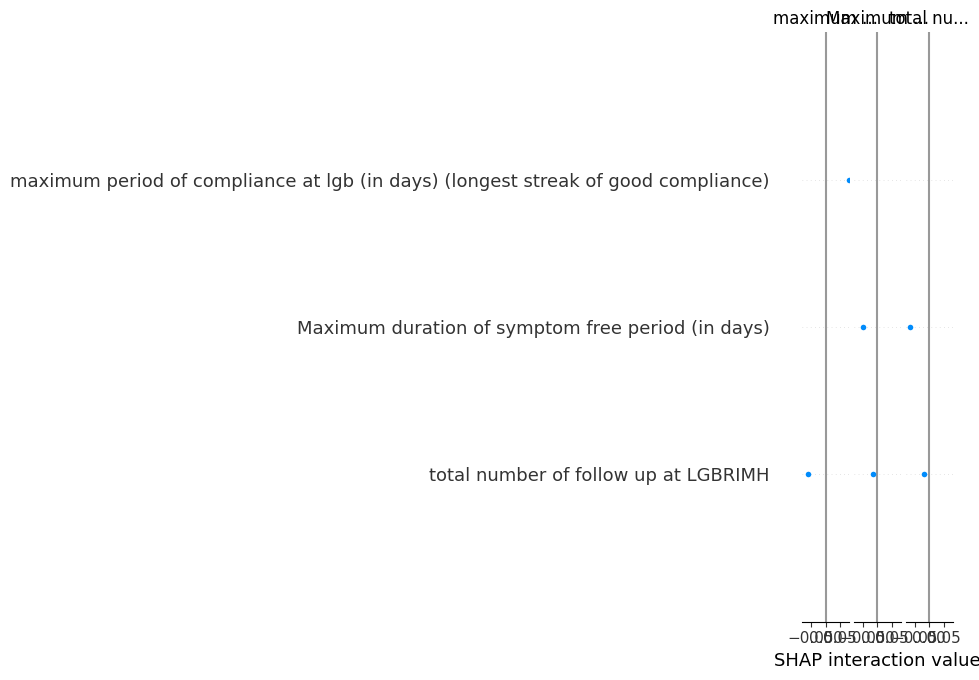



Instance: 28
Original prediction probabilities: [0.325  0.2875 0.3875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03501924  0.02664079  0.00837845]
total number of follow up at LGBRIMH: [ 0.01873283 -0.01187164 -0.00686119]
Maximum duration of symptom free period (in days): [ 0.05978413 -0.02228114 -0.037503  ]
days/freq: [-0.0140306   0.00301016  0.01102043]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03100932  0.00250254  0.02850678]
Off-medications duration (to add all such durations over follow-up in days): [-0.04434733  0.0059368   0.03841053]
Total duration of medication 2(in days) : [-0.00083067  0.01008395 -0.00925328]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.04308678 -0.00636718 -0.0367196 ]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

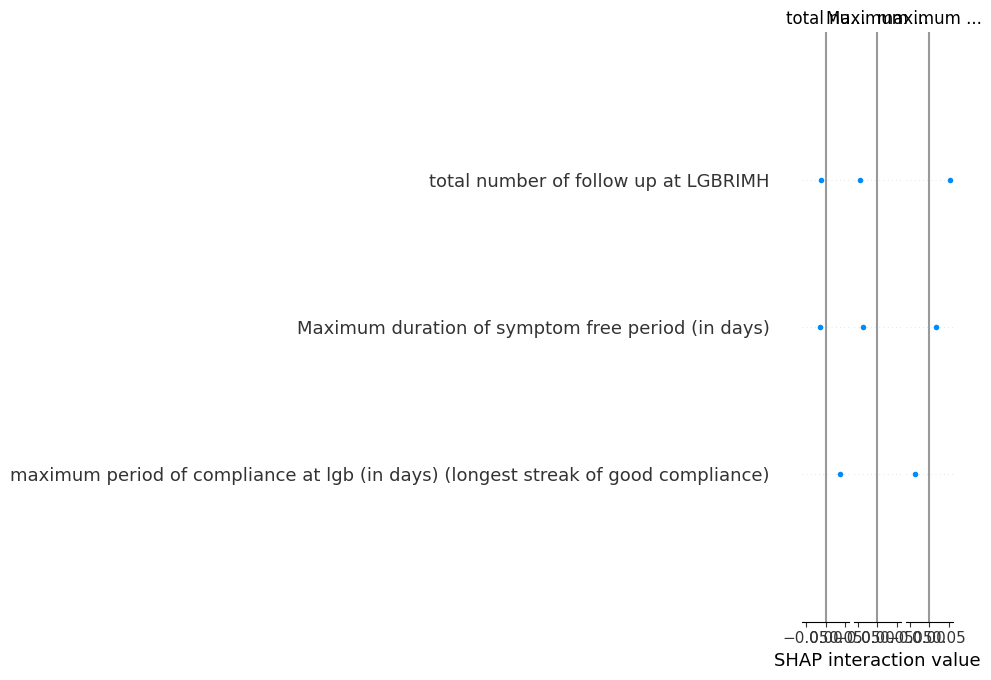



Instance: 29
Original prediction probabilities: [0.3    0.3375 0.3625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.01502303  0.01825384 -0.00323081]
total number of follow up at LGBRIMH: [ 0.04097725 -0.03549637 -0.00548087]
Maximum duration of symptom free period (in days): [-0.02141639  0.02120901  0.00020738]
days/freq: [ 0.07656413 -0.00549359 -0.07107053]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03122928  0.01128791  0.01994137]
Off-medications duration (to add all such durations over follow-up in days): [-0.02861996  0.0033181   0.02530186]
Total duration of medication 2(in days) : [ 0.00492691 -0.01041236  0.00548545]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.03326127  0.00563433 -0.03889559]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

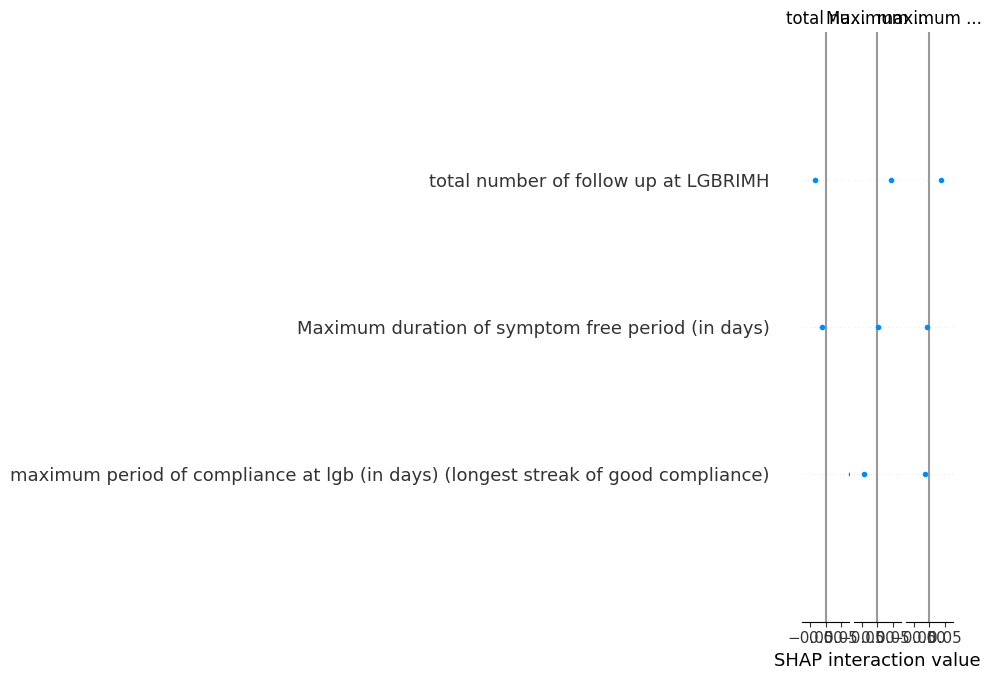

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

X = df4.drop('Final', axis=1)
y = df4['Final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)

results = []

for i in range(len(X_test)):
    instance = X_test.iloc[[i]]
    
    shap_values = explainer.shap_values(instance, check_additivity=False)  # Disable additivity check
    if isinstance(shap_values, np.ndarray):
        feature_contributions = shap_values[0]  
    else:
        feature_contributions = shap_values.base_values[0]  
    
    for feature, weight in zip(X.columns, feature_contributions):
        results.append({'Instance': i, 'Feature': feature, 'Weight': weight})
        
    print('Instance:', i)
    print('Original prediction probabilities:', model.predict_proba(instance)[0])
    print('SHAP explanation for the prediction:')
    for feature, weight in zip(X.columns, feature_contributions):
        print(f"{feature}: {weight}")
        
    shap.summary_plot(shap_values, instance)
    print('\n')

df_results = pd.DataFrame(results)

final_table = df_results.groupby('Feature').agg({'Weight': 'mean'}).reset_index()
final_table['Rank'] = final_table['Weight'].rank(ascending=False)

print('Final Table:')
print(final_table)


Instance: 0
Original prediction probabilities: [0.7    0.1125 0.1875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.09853609 -0.024528   -0.07400809]
total number of follow up at LGBRIMH: [ 0.06907832 -0.02457082 -0.04450751]
Maximum duration of symptom free period (in days): [ 0.00194153  0.00487402 -0.00681555]
days/freq: [-0.00836253  0.00631407  0.00204846]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.05810381 -0.00936072 -0.04874309]
Off-medications duration (to add all such durations over follow-up in days): [-0.01212512 -0.01716389  0.02928901]
Total duration of medication 2(in days) : [ 0.02724215 -0.01376401 -0.01347815]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00344694  0.0009139   0.00253304]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

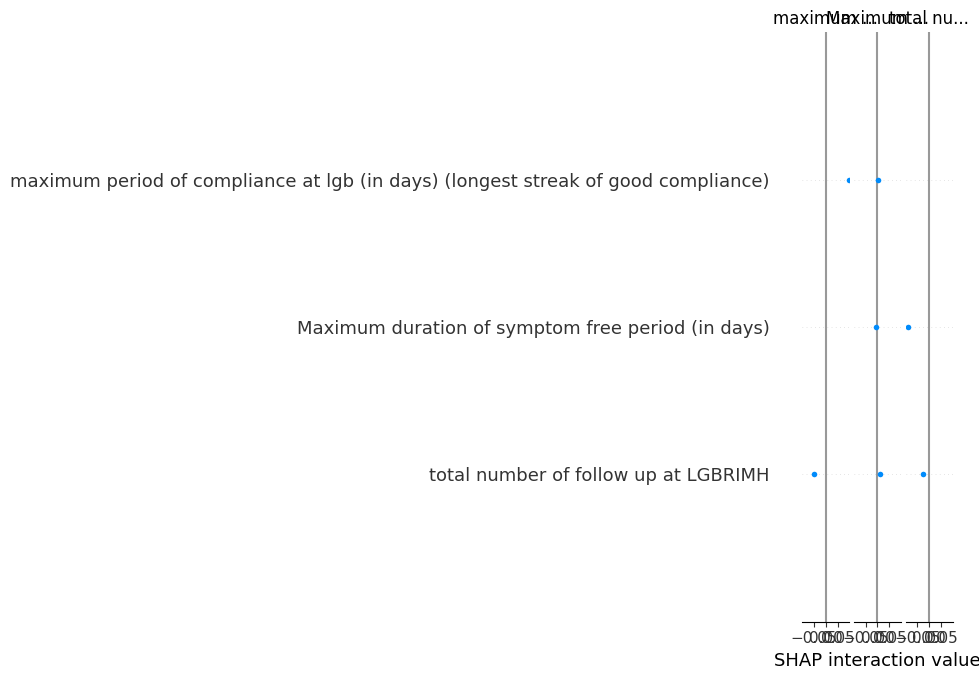



Instance: 1
Original prediction probabilities: [0.2375 0.15   0.6125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.0442526   0.01653489  0.0277177 ]
total number of follow up at LGBRIMH: [ 0.01805925 -0.01678233 -0.00127692]
Maximum duration of symptom free period (in days): [-0.00633931  0.00480631  0.001533  ]
days/freq: [-0.02072999  0.00447885  0.01625114]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.00035139  0.00639132 -0.00603993]
Off-medications duration (to add all such durations over follow-up in days): [-0.05142087 -0.01923352  0.07065439]
Total duration of medication 2(in days) : [-0.00503801  0.02325582 -0.01821781]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02444819 -0.00057543  0.02502361]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

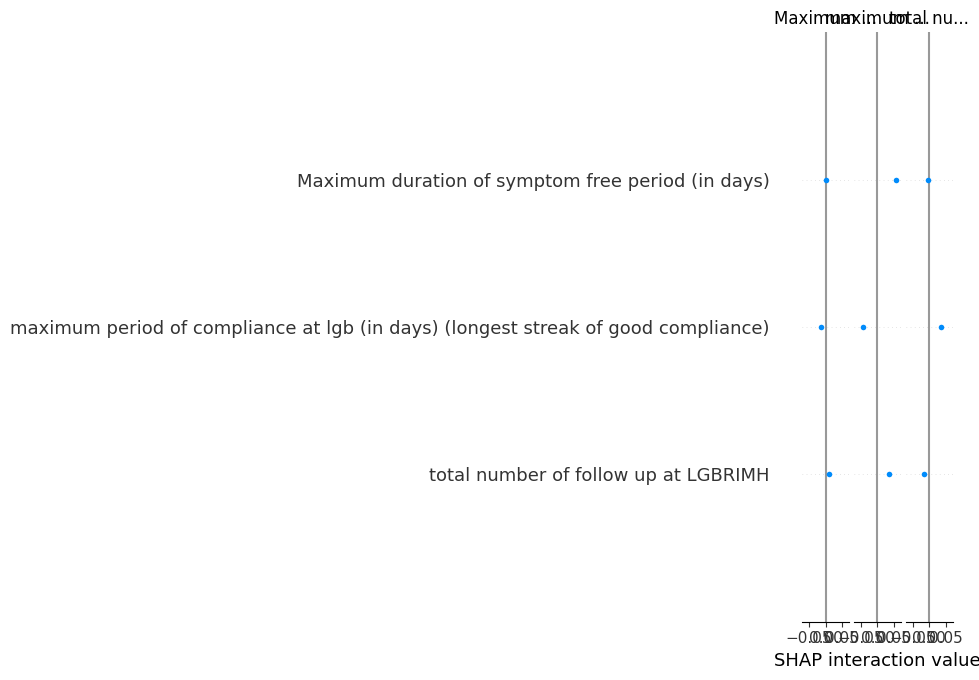



Instance: 2
Original prediction probabilities: [0.15   0.2125 0.6375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04673738  0.012869    0.03386838]
total number of follow up at LGBRIMH: [-0.03486062  0.01533083  0.0195298 ]
Maximum duration of symptom free period (in days): [ 0.01373188  0.00634645 -0.02007833]
days/freq: [-0.01621688  0.00013154  0.01608533]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01134262 -0.00942453  0.02076715]
Off-medications duration (to add all such durations over follow-up in days): [-0.05354877 -0.02234881  0.07589758]
Total duration of medication 2(in days) : [ 0.00296436  0.00329703 -0.0062614 ]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02949728  0.00483931  0.02465797]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


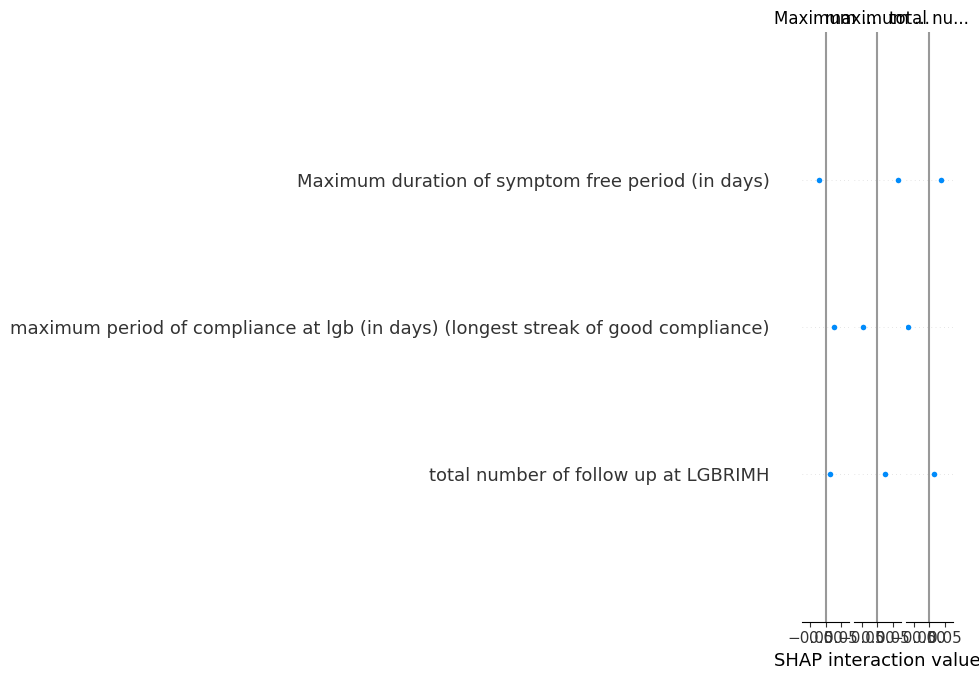



Instance: 3
Original prediction probabilities: [0.025 0.25  0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02925602 -0.00336109  0.03261711]
total number of follow up at LGBRIMH: [-0.04747544  0.01706939  0.03040605]
Maximum duration of symptom free period (in days): [-0.03302418  0.01550037  0.0175238 ]
days/freq: [-0.02413185 -0.00092924  0.02506109]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02430861  0.00730619  0.01700242]
Off-medications duration (to add all such durations over follow-up in days): [-0.03539338 -0.02461503  0.06000841]
Total duration of medication 2(in days) : [ 0.0047749  -0.00054321 -0.00423169]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01178806 -0.00505857  0.01684663]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

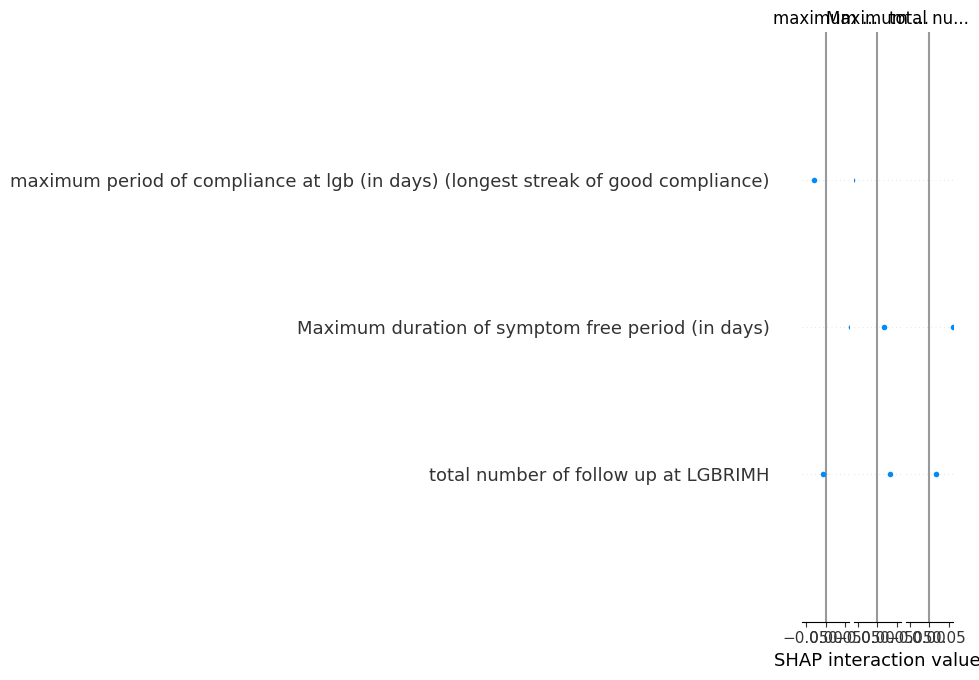



Instance: 4
Original prediction probabilities: [0.3875 0.25   0.3625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.08148727  0.0346537   0.04683357]
total number of follow up at LGBRIMH: [-0.009592    0.00564338  0.00394862]
Maximum duration of symptom free period (in days): [ 0.07750628 -0.01944485 -0.05806143]
days/freq: [ 0.00938742 -0.00210597 -0.00728145]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02130069  0.02042471  0.00087598]
Off-medications duration (to add all such durations over follow-up in days): [-0.03343662 -0.0206673   0.05410393]
Total duration of medication 2(in days) : [-0.03425998  0.00661998  0.02764   ]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05076777 -0.010746   -0.04002177]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

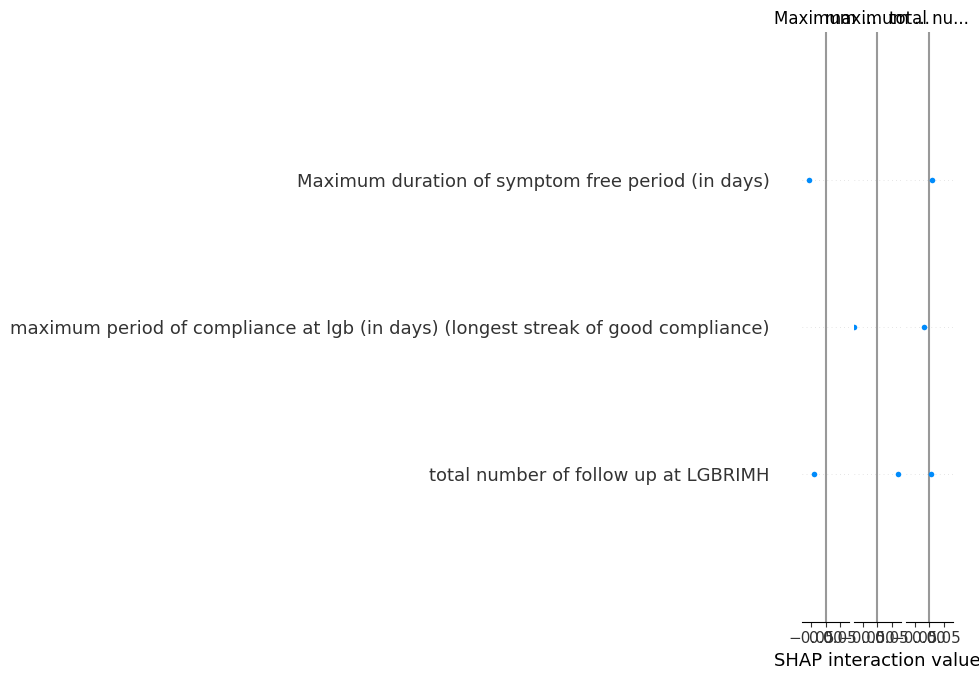



Instance: 5
Original prediction probabilities: [0.8    0.1125 0.0875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.09966419 -0.0241406  -0.07552359]
total number of follow up at LGBRIMH: [ 0.0737134  -0.02155911 -0.05215428]
Maximum duration of symptom free period (in days): [ 0.0929376  -0.03448056 -0.05845704]
days/freq: [-0.00112577  0.00597234 -0.00484658]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.09549979 -0.01886248 -0.07663731]
Off-medications duration (to add all such durations over follow-up in days): [-0.01192676 -0.01014728  0.02207404]
Total duration of medication 2(in days) : [ 0.00986352 -0.00358715 -0.00627637]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02347865  0.02319973  0.00027892]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

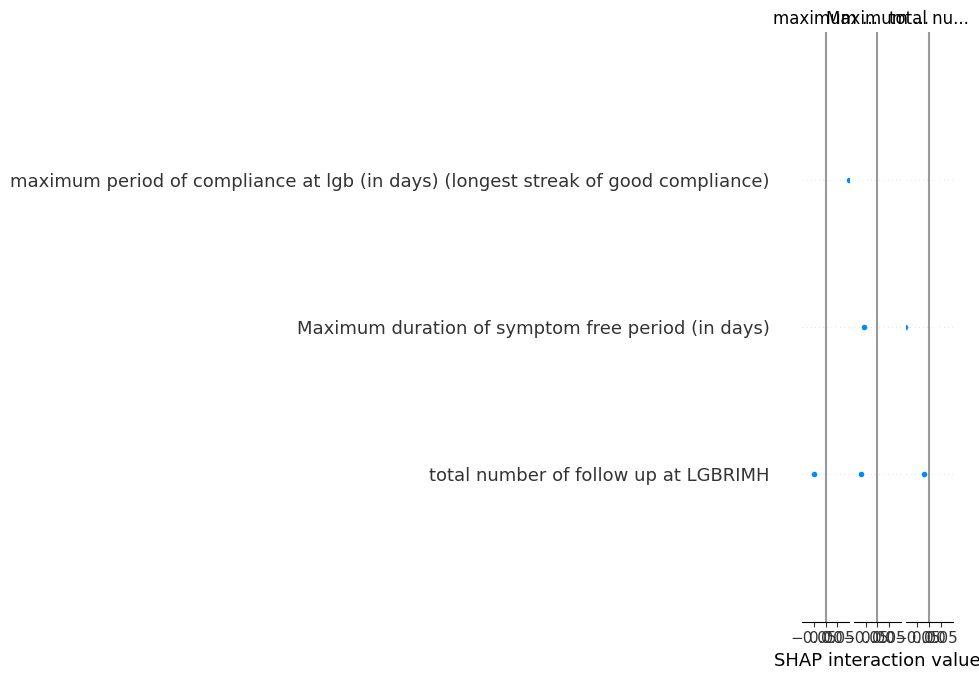



Instance: 6
Original prediction probabilities: [0.05  0.225 0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02990238 -0.02050369  0.05040607]
total number of follow up at LGBRIMH: [-0.05518408  0.00927035  0.04591373]
Maximum duration of symptom free period (in days): [-0.03185361  0.01811011  0.0137435 ]
days/freq: [-0.00891095  0.00423945  0.0046715 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02331204  0.00910921  0.01420282]
Off-medications duration (to add all such durations over follow-up in days): [-0.01850809 -0.03659175  0.05509983]
Total duration of medication 2(in days) : [-0.02295843  0.02435502 -0.00139659]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.0049072   0.00594146 -0.00103426]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

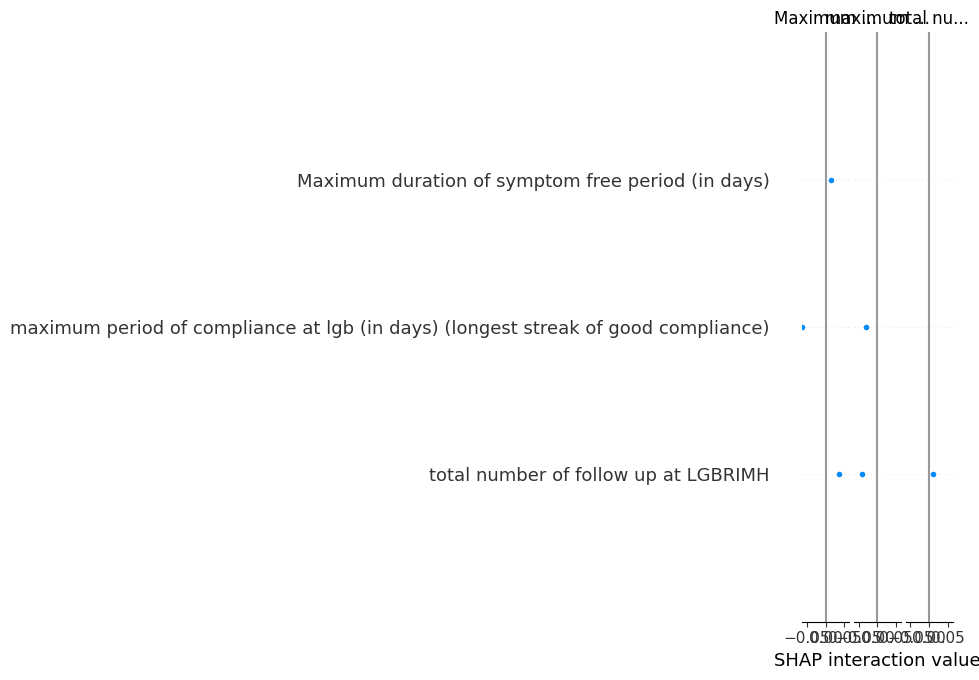



Instance: 7
Original prediction probabilities: [0.5    0.3625 0.1375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.01168638  0.01541002 -0.00372364]
total number of follow up at LGBRIMH: [-0.04822495  0.0336279   0.01459704]
Maximum duration of symptom free period (in days): [-0.02683505  0.01710751  0.00972754]
days/freq: [ 0.02243674  0.0063998  -0.02883654]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02906922  0.01117408  0.01789514]
Off-medications duration (to add all such durations over follow-up in days): [ 0.12283044  0.01623379 -0.13906423]
Total duration of medication 2(in days) : [ 0.00034302  0.00131904 -0.00166206]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.02465778 -0.00528913 -0.01936865]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

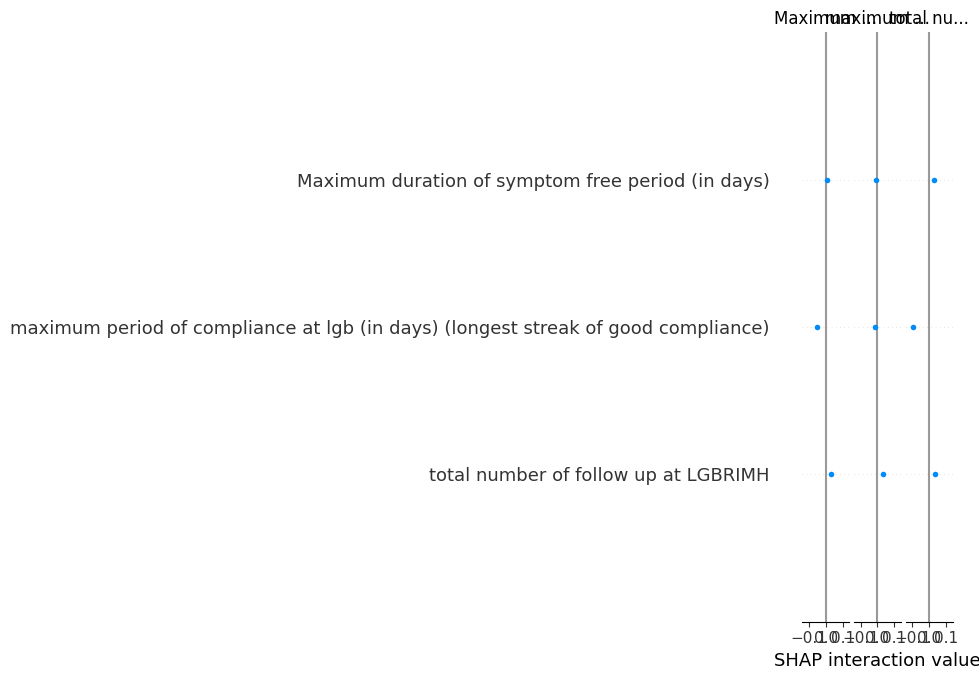



Instance: 8
Original prediction probabilities: [0.275 0.45  0.275]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02524651  0.03153061 -0.00628411]
total number of follow up at LGBRIMH: [-0.00566573  0.00402741  0.00163832]
Maximum duration of symptom free period (in days): [-0.04634735  0.03029693  0.01605042]
days/freq: [ 0.03251047 -0.00225069 -0.03025978]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01655464  0.00933315  0.0072215 ]
Off-medications duration (to add all such durations over follow-up in days): [-0.04748818  0.01869366  0.02879452]
Total duration of medication 2(in days) : [ 0.00098553  0.00339176 -0.00437729]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.00255722  0.01463267 -0.01718989]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken d

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


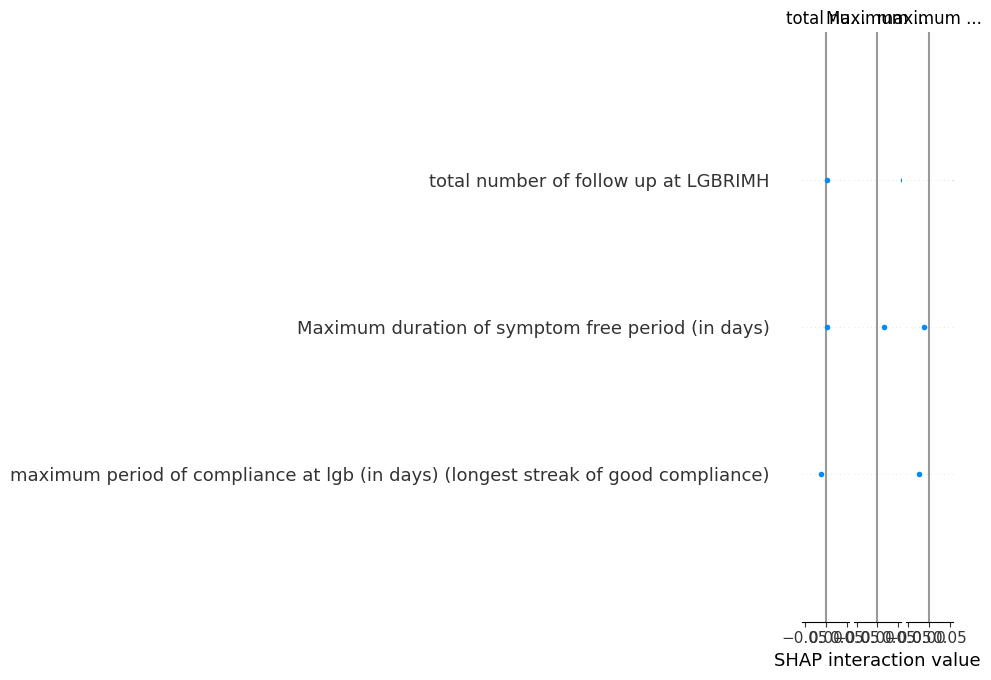



Instance: 9
Original prediction probabilities: [0.575  0.2375 0.1875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.0639224  -0.02230711 -0.0416153 ]
total number of follow up at LGBRIMH: [ 0.06195645 -0.02009523 -0.04186122]
Maximum duration of symptom free period (in days): [ 0.01610157 -0.00145197 -0.0146496 ]
days/freq: [-0.00615553 -0.00021241  0.00636795]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.00741536  0.00172521 -0.00914056]
Off-medications duration (to add all such durations over follow-up in days): [ 0.00663423  0.01162374 -0.01825797]
Total duration of medication 2(in days) : [ 0.0235242  -0.00912066 -0.01440354]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.02382973 -0.01704955 -0.00678018]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were take

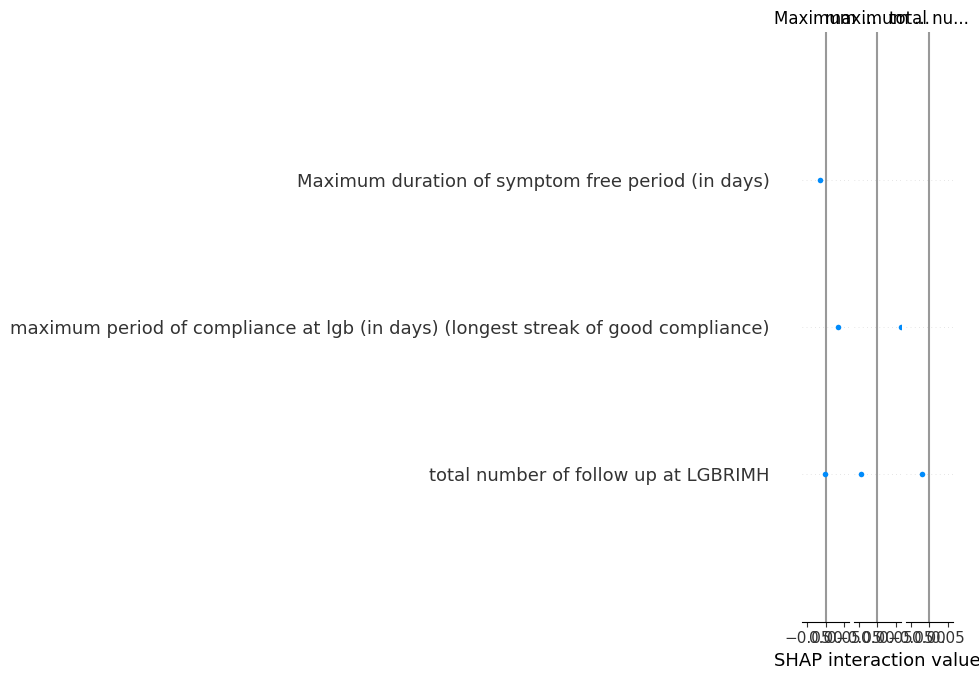



Instance: 10
Original prediction probabilities: [0.075 0.2   0.725]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04991326 -0.00706873  0.05698199]
total number of follow up at LGBRIMH: [-0.06291632  0.00543622  0.0574801 ]
Maximum duration of symptom free period (in days): [-0.03826793  0.01662859  0.02163934]
days/freq: [-0.01664734 -0.0056839   0.02233124]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03079381  0.00732977  0.02346403]
Off-medications duration (to add all such durations over follow-up in days): [-0.03547299 -0.05203857  0.08751156]
Total duration of medication 2(in days) : [ 0.01128396  0.0046829  -0.01596685]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00730505 -0.00178599  0.00909104]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

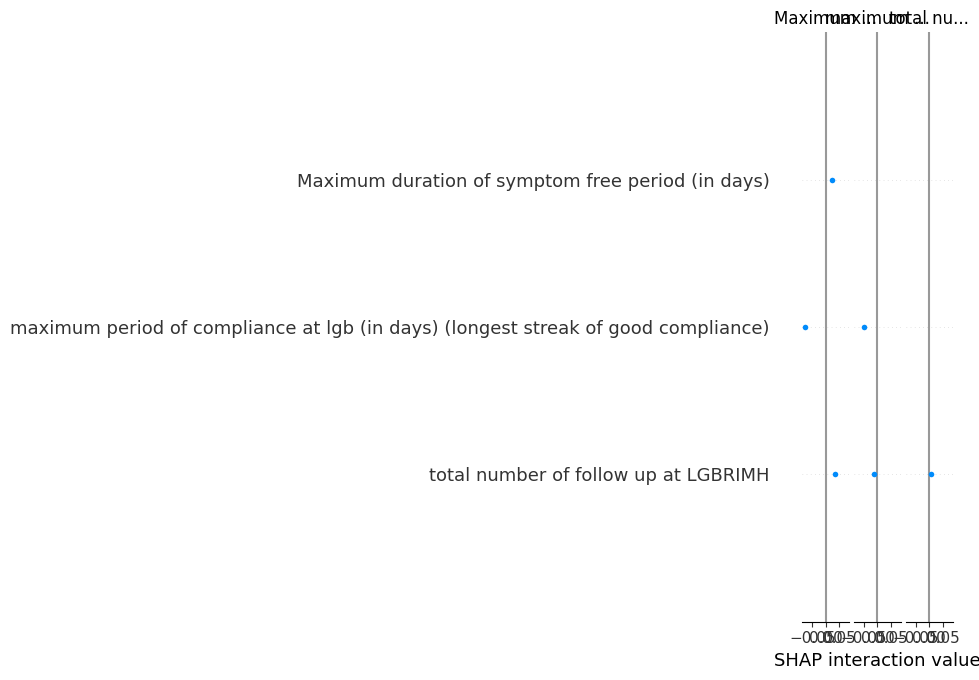



Instance: 11
Original prediction probabilities: [0.5125 0.2    0.2875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.07182556 -0.0417933  -0.03003226]
total number of follow up at LGBRIMH: [ 0.01353117 -0.00937151 -0.00415967]
Maximum duration of symptom free period (in days): [ 0.0845944  -0.03533091 -0.04926349]
days/freq: [ 0.00901506 -0.00012091 -0.00889415]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03364765  0.01120289  0.02244476]
Off-medications duration (to add all such durations over follow-up in days): [-0.02399558 -0.00881593  0.03281151]
Total duration of medication 2(in days) : [ 0.0157896  -0.01449344 -0.00129616]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05206902 -0.01678631 -0.03528271]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

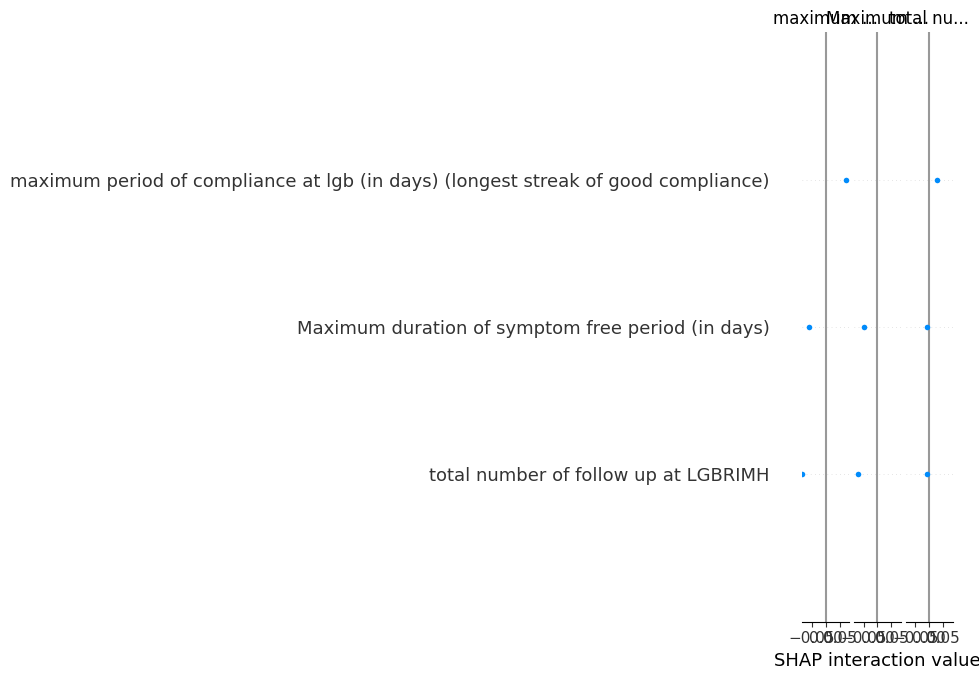



Instance: 12
Original prediction probabilities: [0.75   0.1625 0.0875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.05174475 -0.01659476 -0.03514999]
total number of follow up at LGBRIMH: [ 0.06212957 -0.0327744  -0.02935517]
Maximum duration of symptom free period (in days): [-0.00170742 -0.00353401  0.00524143]
days/freq: [ 0.02378339 -0.01501258 -0.00877082]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01219828  0.00399084  0.00820744]
Off-medications duration (to add all such durations over follow-up in days): [ 0.07906322  0.03131495 -0.11037818]
Total duration of medication 2(in days) : [-0.00057251  0.01182699 -0.01125448]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05564063 -0.02589881 -0.02974182]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

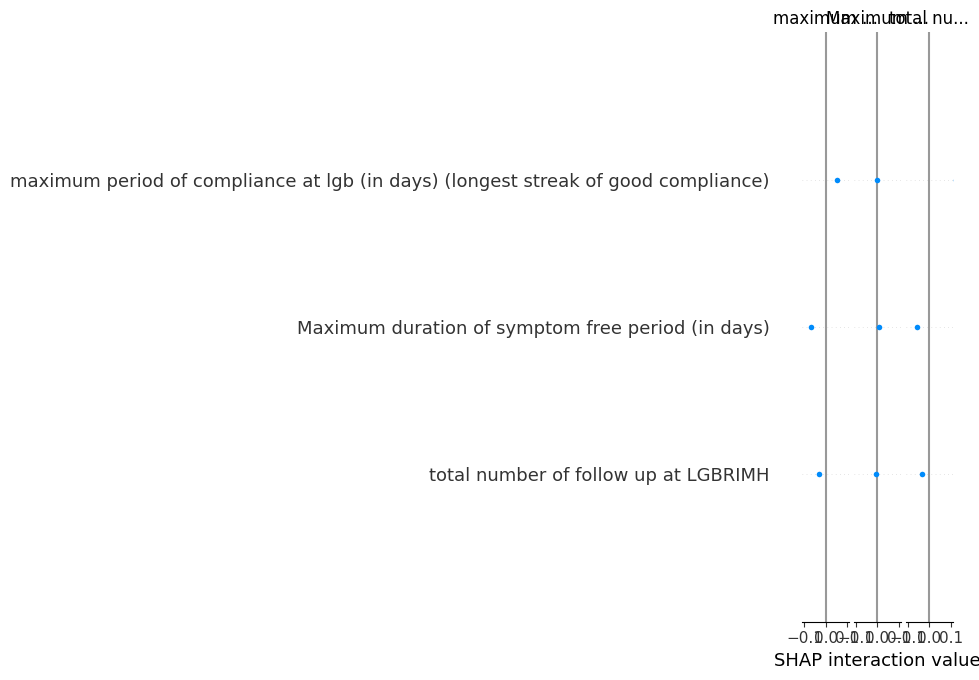



Instance: 13
Original prediction probabilities: [0.225 0.5   0.275]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02277382  0.03131038 -0.00853656]
total number of follow up at LGBRIMH: [-0.0115399   0.01543236 -0.00389246]
Maximum duration of symptom free period (in days): [ 0.00355549  0.0084451  -0.0120006 ]
days/freq: [ 0.05519811 -0.00752719 -0.04767092]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.00876853  0.01245755 -0.00368902]
Off-medications duration (to add all such durations over follow-up in days): [-0.04183039  0.02389458  0.01793581]
Total duration of medication 2(in days) : [-0.00290531  0.01388942 -0.01098411]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.03393888  0.0121852   0.02175368]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


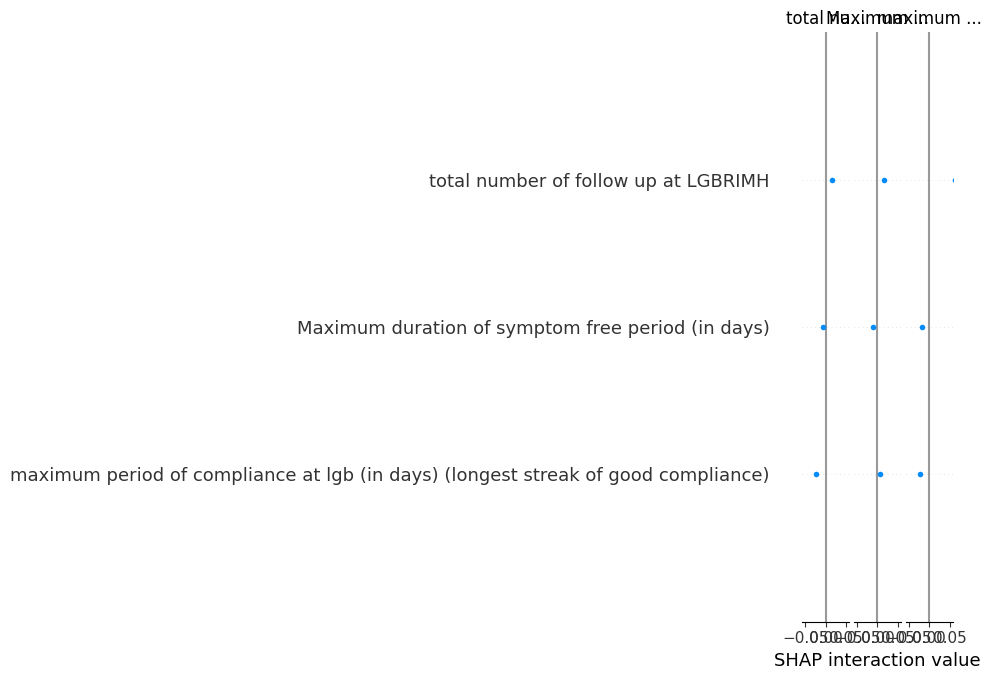



Instance: 14
Original prediction probabilities: [0.3    0.3875 0.3125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04469016  0.02682728  0.01786288]
total number of follow up at LGBRIMH: [ 0.02436607 -0.0020712  -0.02229487]
Maximum duration of symptom free period (in days): [ 0.07265199 -0.03407712 -0.03857487]
days/freq: [ 0.03804547 -0.00426959 -0.03377588]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03038727  0.00556739  0.02481988]
Off-medications duration (to add all such durations over follow-up in days): [-0.0404917   0.00118749  0.0393042 ]
Total duration of medication 2(in days) : [ 0.00941097  0.00127236 -0.01068332]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.05326454 -0.02949559 -0.02376894]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

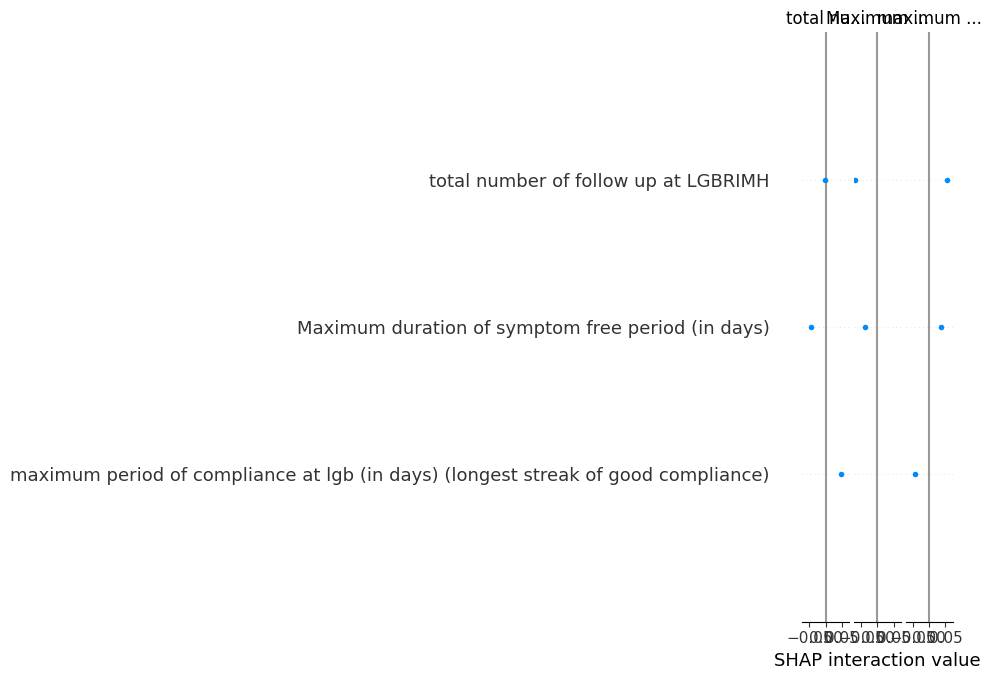



Instance: 15
Original prediction probabilities: [0.4625 0.2625 0.275 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03128301  0.01533056  0.01595245]
total number of follow up at LGBRIMH: [-0.02179586  0.01083808  0.01095779]
Maximum duration of symptom free period (in days): [ 0.05285293 -0.03970289 -0.01315004]
days/freq: [ 0.04135842 -0.01343194 -0.02792648]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01889358  0.01648338  0.0024102 ]
Off-medications duration (to add all such durations over follow-up in days): [ 0.0854002   0.01059411 -0.09599431]
Total duration of medication 2(in days) : [-0.00877359  0.00659103  0.00218256]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.0318896  -0.01794075 -0.01394884]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


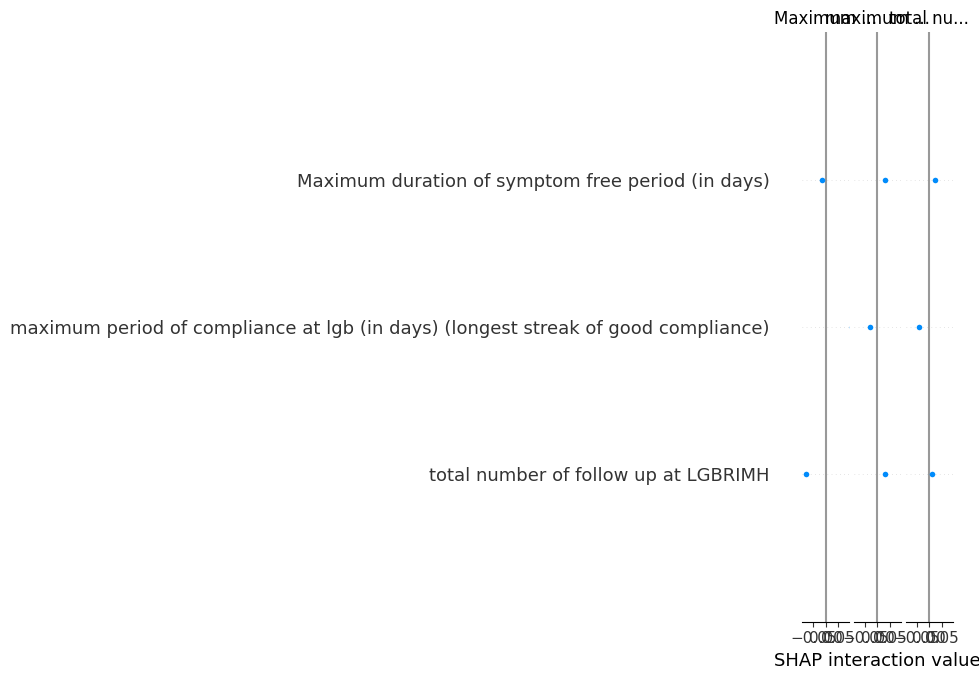



Instance: 16
Original prediction probabilities: [0.0375 0.1375 0.825 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.04132702 -0.00341466  0.04474168]
total number of follow up at LGBRIMH: [-0.06800473  0.0149276   0.05307713]
Maximum duration of symptom free period (in days): [-0.03580148  0.01352193  0.02227955]
days/freq: [-0.01036071  0.01214057 -0.00177986]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02055486  0.00243629  0.01811857]
Off-medications duration (to add all such durations over follow-up in days): [-0.03239283 -0.05265431  0.08504715]
Total duration of medication 2(in days) : [ 0.0087764  -0.0027153  -0.00606109]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01797112 -0.00765525  0.02562637]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

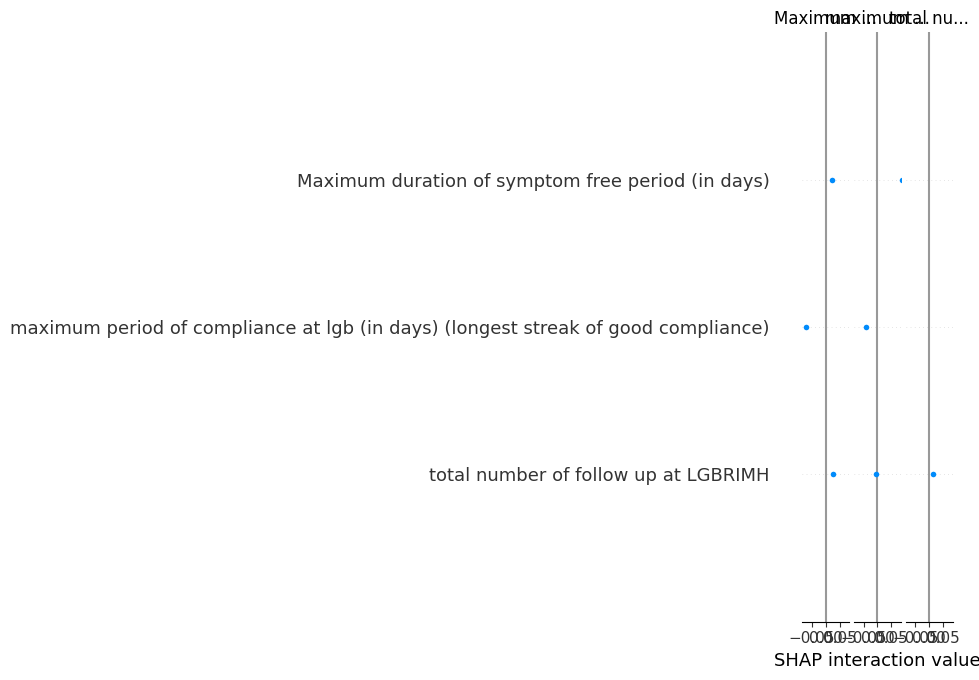



Instance: 17
Original prediction probabilities: [0.1   0.475 0.425]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.02992953  0.00623535  0.02369418]
total number of follow up at LGBRIMH: [-0.05250694  0.02099355  0.0315134 ]
Maximum duration of symptom free period (in days): [-0.03944462  0.02597765  0.01346697]
days/freq: [ 0.02251473  0.00327393 -0.02578866]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02889522  0.00897118  0.01992404]
Off-medications duration (to add all such durations over follow-up in days): [-0.04266713 -0.02599842  0.06866556]
Total duration of medication 2(in days) : [-0.00677722  0.00835405 -0.00157684]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01561345 -0.00445729  0.02007075]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken 

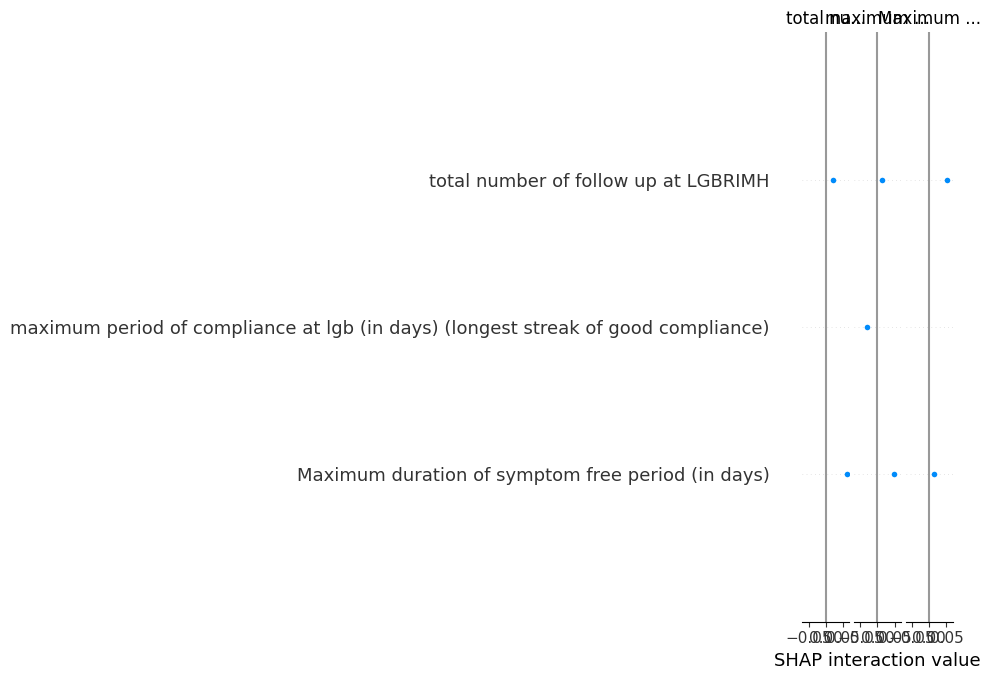



Instance: 18
Original prediction probabilities: [0.2625 0.3375 0.4   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03829566  0.01896042  0.01933524]
total number of follow up at LGBRIMH: [-0.037533    0.00486908  0.03266392]
Maximum duration of symptom free period (in days): [-0.04468321  0.02172981  0.0229534 ]
days/freq: [-0.02137344 -0.00332963  0.02470306]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02647322  0.00017056  0.02630266]
Off-medications duration (to add all such durations over follow-up in days): [ 0.07248351  0.06941792 -0.14190143]
Total duration of medication 2(in days) : [-0.04602265  0.04285413  0.00316852]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00028597 -0.00629488  0.00658085]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

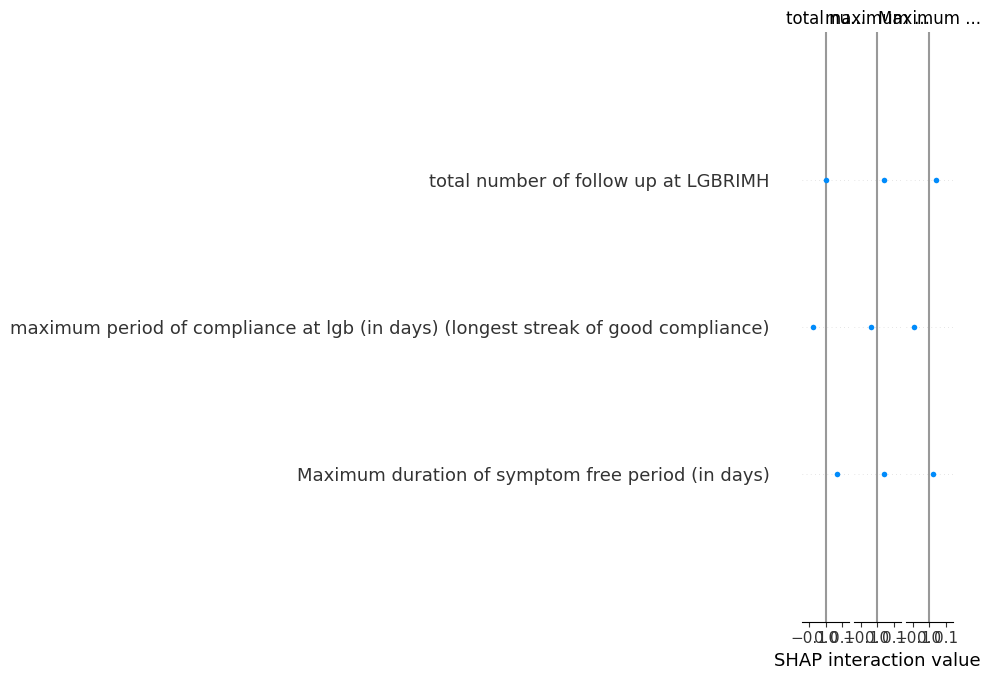



Instance: 19
Original prediction probabilities: [0.4375 0.2875 0.275 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.01562015  0.00298123 -0.01860138]
total number of follow up at LGBRIMH: [ 0.05708446 -0.01913279 -0.03795166]
Maximum duration of symptom free period (in days): [-0.05307416  0.01572661  0.03734755]
days/freq: [ 0.00255924  0.00189534 -0.00445458]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.00093877  0.00700147 -0.00794024]
Off-medications duration (to add all such durations over follow-up in days): [-0.0354408  -0.01140345  0.04684425]
Total duration of medication 2(in days) : [ 0.00725798  0.02033777 -0.02759575]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.00087761 -0.003858    0.00298038]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

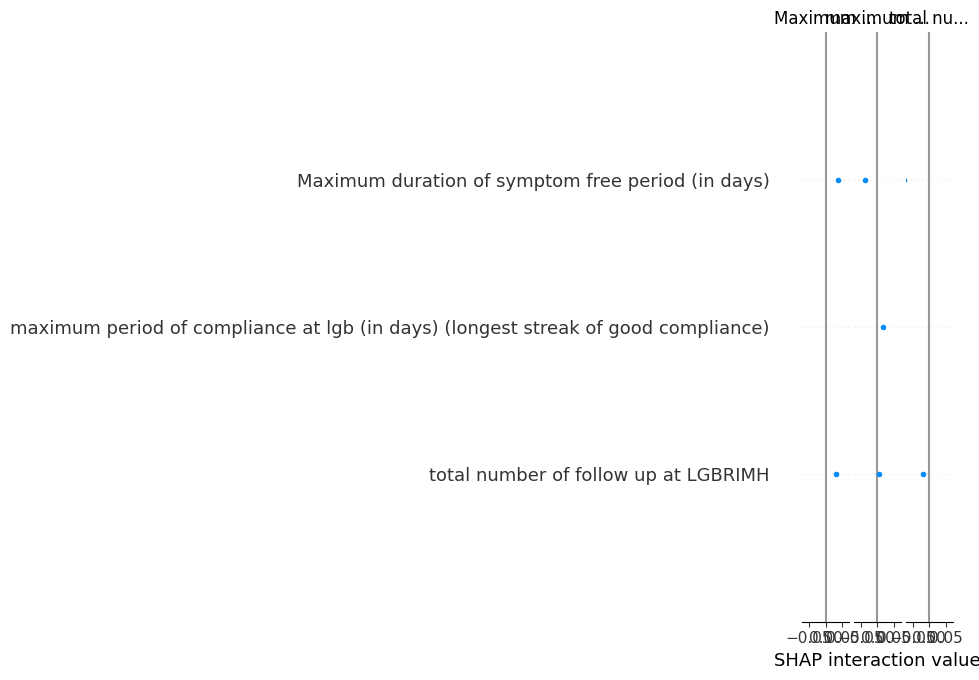



Instance: 20
Original prediction probabilities: [0.1125 0.55   0.3375]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03522195  0.00927723  0.02594472]
total number of follow up at LGBRIMH: [-0.06293921  0.02934824  0.03359097]
Maximum duration of symptom free period (in days): [-0.04349874  0.0311367   0.01236203]
days/freq: [-0.02446767  0.00540587  0.0190618 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03393928  0.0173164   0.01662288]
Off-medications duration (to add all such durations over follow-up in days): [ 0.05625525  0.10575509 -0.16201034]
Total duration of medication 2(in days) : [-0.04730944  0.06131789 -0.01400846]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00508209 -0.00407593  0.00915802]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

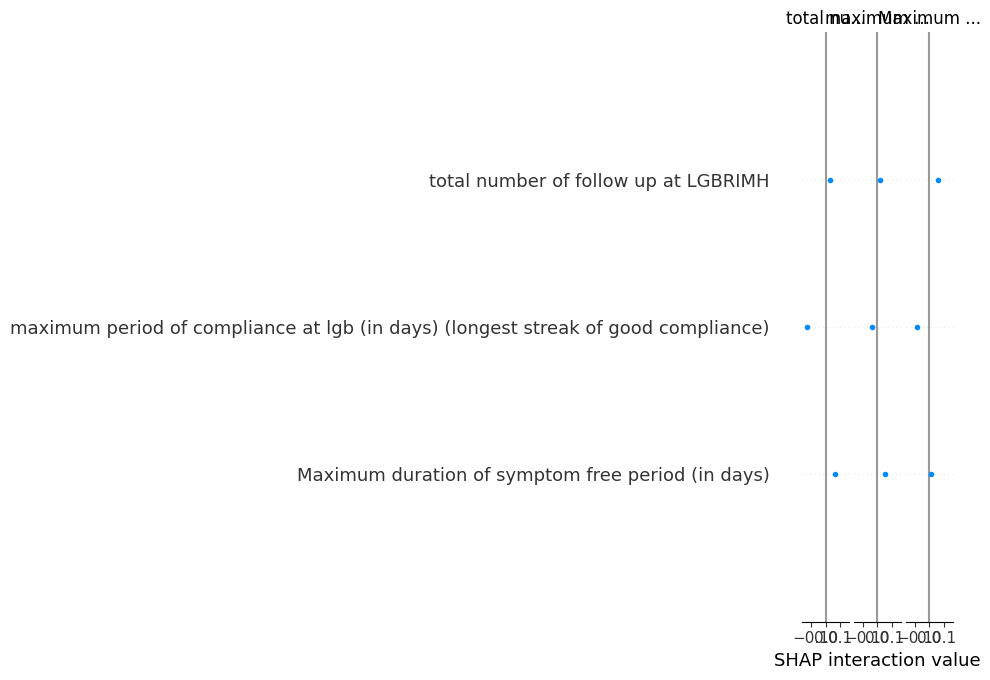



Instance: 21
Original prediction probabilities: [0.325  0.4125 0.2625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03577297  0.02328827  0.01248471]
total number of follow up at LGBRIMH: [-0.03902669  0.02132088  0.01770581]
Maximum duration of symptom free period (in days): [-0.03708999  0.04132114 -0.00423115]
days/freq: [-0.03521976  0.02268585  0.01253391]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02383838  0.00896156  0.01487682]
Off-medications duration (to add all such durations over follow-up in days): [ 0.10510107  0.05561225 -0.16071332]
Total duration of medication 2(in days) : [ 0.00128415  0.00227594 -0.00356009]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00111296 -0.00480624  0.0059192 ]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

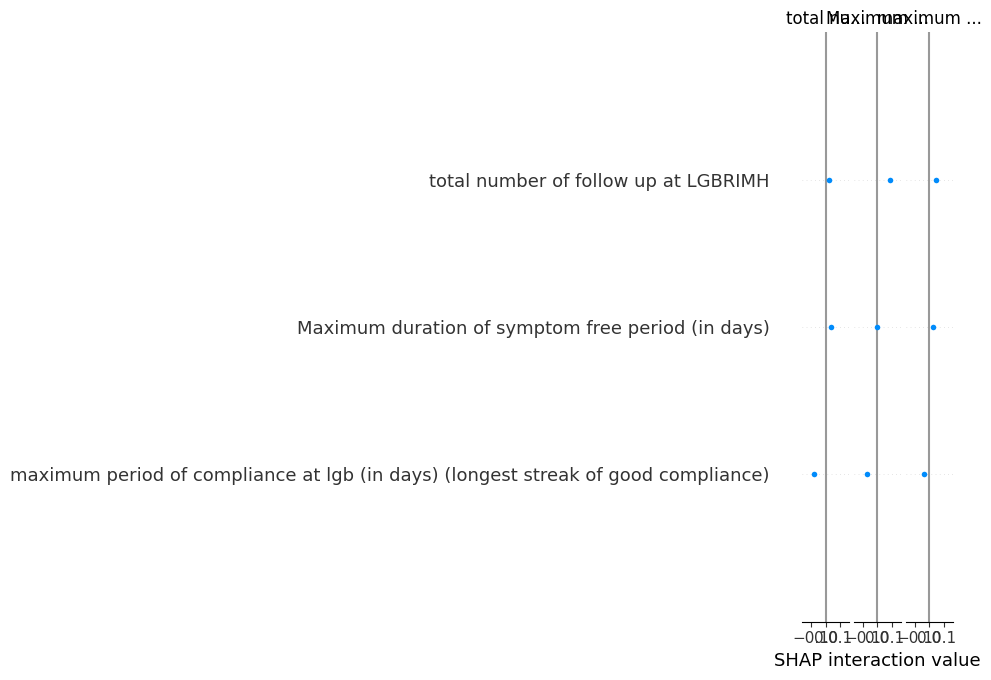



Instance: 22
Original prediction probabilities: [0.7125 0.1875 0.1   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.03960028  0.00793307 -0.04753336]
total number of follow up at LGBRIMH: [ 0.05278344 -0.02376504 -0.02901841]
Maximum duration of symptom free period (in days): [ 0.00958095 -0.01248202  0.00290107]
days/freq: [ 0.02440134 -0.00448409 -0.01991725]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [ 0.0393187  -0.02035185 -0.01896685]
Off-medications duration (to add all such durations over follow-up in days): [ 0.06806978  0.01635067 -0.08442045]
Total duration of medication 2(in days) : [ 0.00340267  0.00714228 -0.01054495]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.03127164 -0.01227668 -0.01899496]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


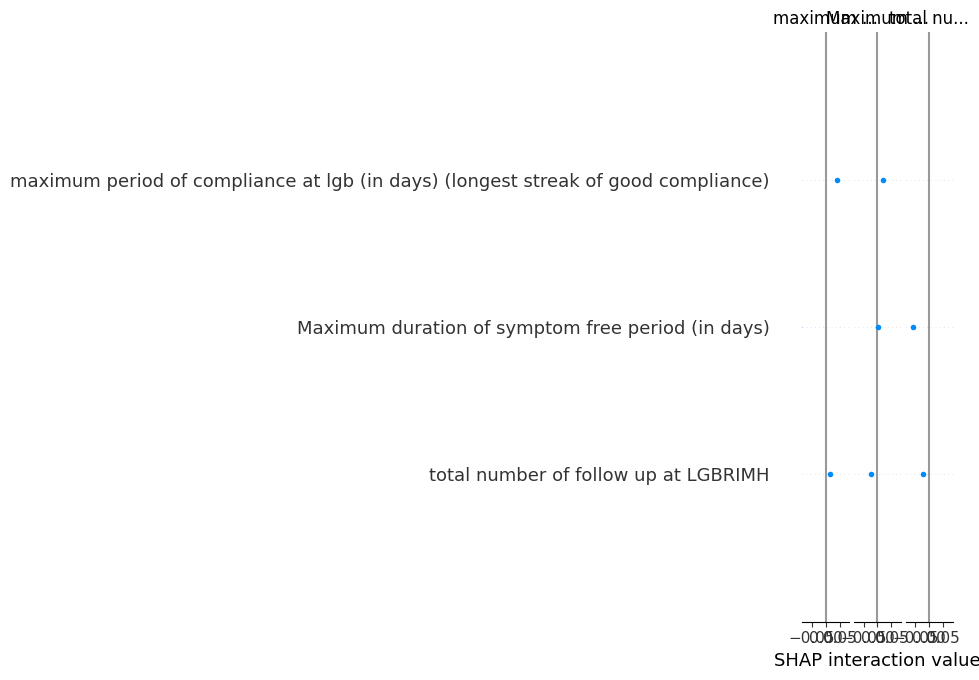



Instance: 23
Original prediction probabilities: [0.35 0.15 0.5 ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03637921  0.00996361  0.0264156 ]
total number of follow up at LGBRIMH: [ 0.04202208 -0.02886101 -0.01316107]
Maximum duration of symptom free period (in days): [-0.04854761  0.01887036  0.02967726]
days/freq: [ 0.04113148 -0.01363479 -0.0274967 ]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01340568 -0.00059445  0.01400013]
Off-medications duration (to add all such durations over follow-up in days): [ 0.01314964  0.03514529 -0.04829492]
Total duration of medication 2(in days) : [-0.00143688  0.00671687 -0.00527999]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.04824991 -0.01648282 -0.03176709]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken div

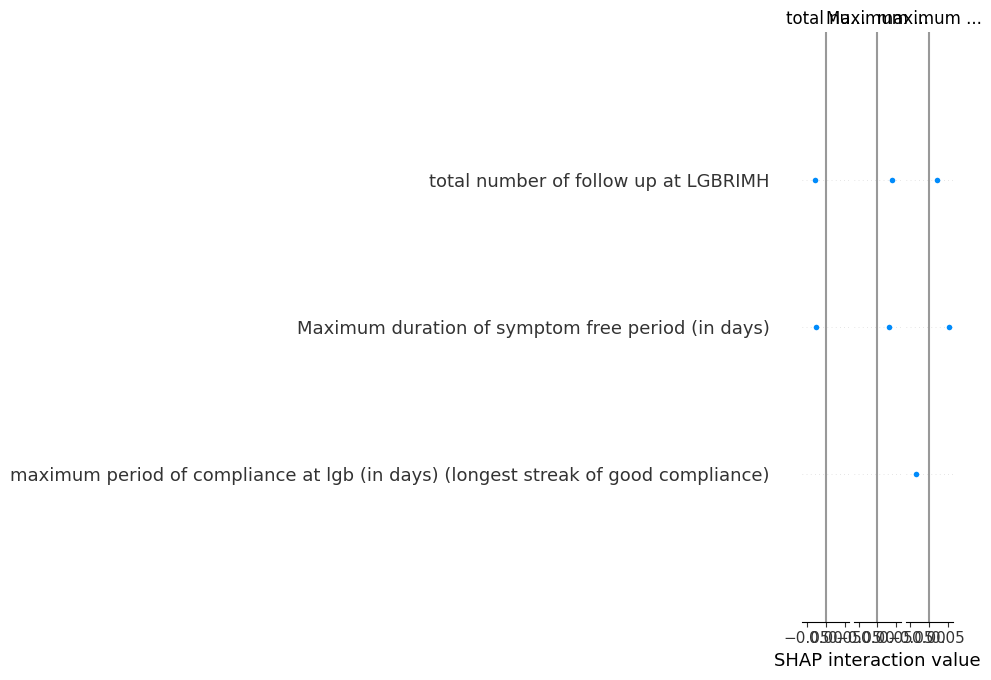



Instance: 24
Original prediction probabilities: [0.2125 0.325  0.4625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03462062 -0.00144358  0.0360642 ]
total number of follow up at LGBRIMH: [-0.04153484  0.01079504  0.0307398 ]
Maximum duration of symptom free period (in days): [-0.03972066  0.01686633  0.02285432]
days/freq: [-0.02218828  0.00715564  0.01503265]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02306609  0.00187612  0.02118997]
Off-medications duration (to add all such durations over follow-up in days): [ 0.00151566  0.03653169 -0.03804735]
Total duration of medication 2(in days) : [-0.02715057  0.02533194  0.00181863]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01388207  0.00368793  0.01019414]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


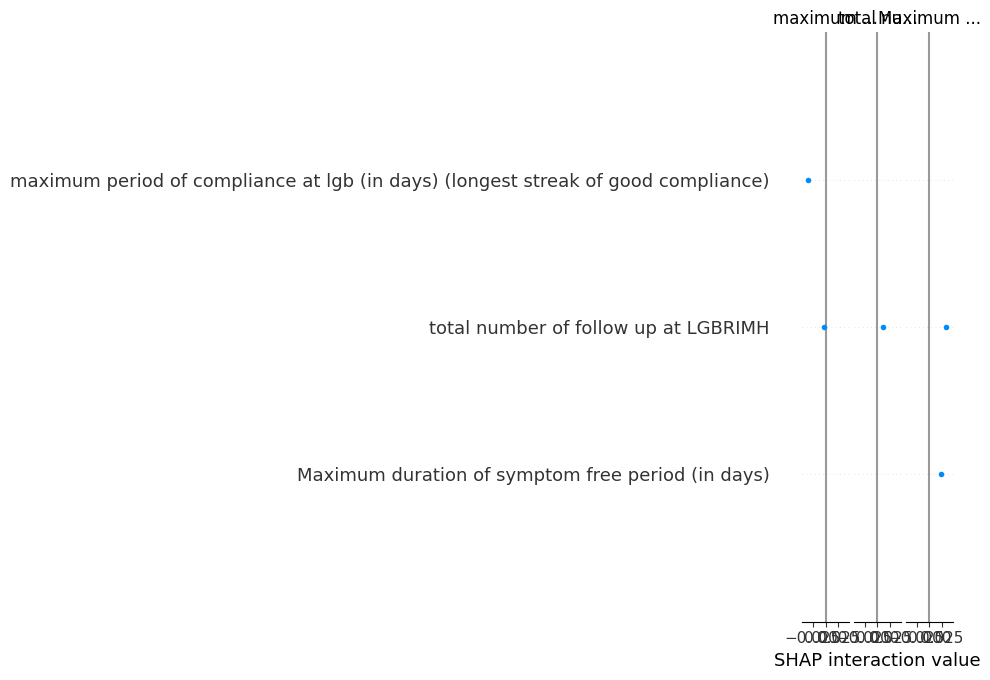



Instance: 25
Original prediction probabilities: [0.1875 0.325  0.4875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.01557663 -0.00069781 -0.01487882]
total number of follow up at LGBRIMH: [-0.04296435  0.00830726  0.03465709]
Maximum duration of symptom free period (in days): [-0.00291393  0.00026025  0.00265368]
days/freq: [-1.61103915e-02  6.83009510e-05  1.60420905e-02]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02933679  0.01038243  0.01895436]
Off-medications duration (to add all such durations over follow-up in days): [-0.00448602  0.03611206 -0.03162603]
Total duration of medication 2(in days) : [-0.03616225  0.02606638  0.01009587]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.00235045  0.00406282 -0.00171237]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medicati

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


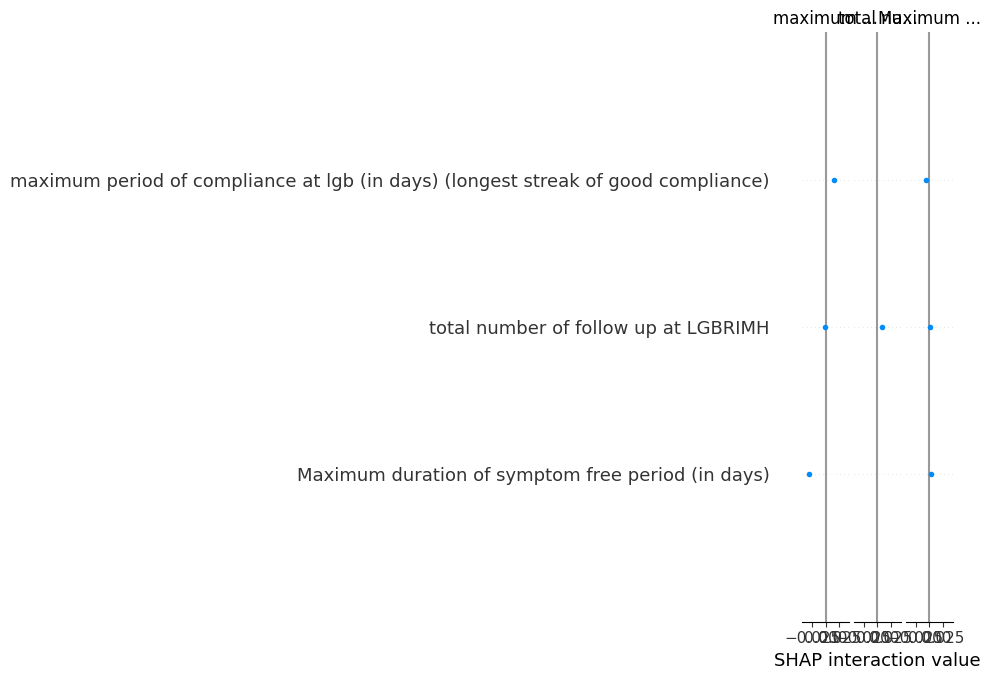



Instance: 26
Original prediction probabilities: [0.0375 0.0625 0.9   ]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03917717  0.00224884  0.03692833]
total number of follow up at LGBRIMH: [-0.04455837  0.01218077  0.0323776 ]
Maximum duration of symptom free period (in days): [-0.03784554  0.00301103  0.03483451]
days/freq: [-0.03296178  0.01346996  0.01949182]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.02218697  0.00120979  0.02097718]
Off-medications duration (to add all such durations over follow-up in days): [-0.05057691 -0.0480271   0.098604  ]
Total duration of medication 2(in days) : [ 0.00540146 -0.00426087 -0.00114059]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.02289359 -0.00280344  0.02569703]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

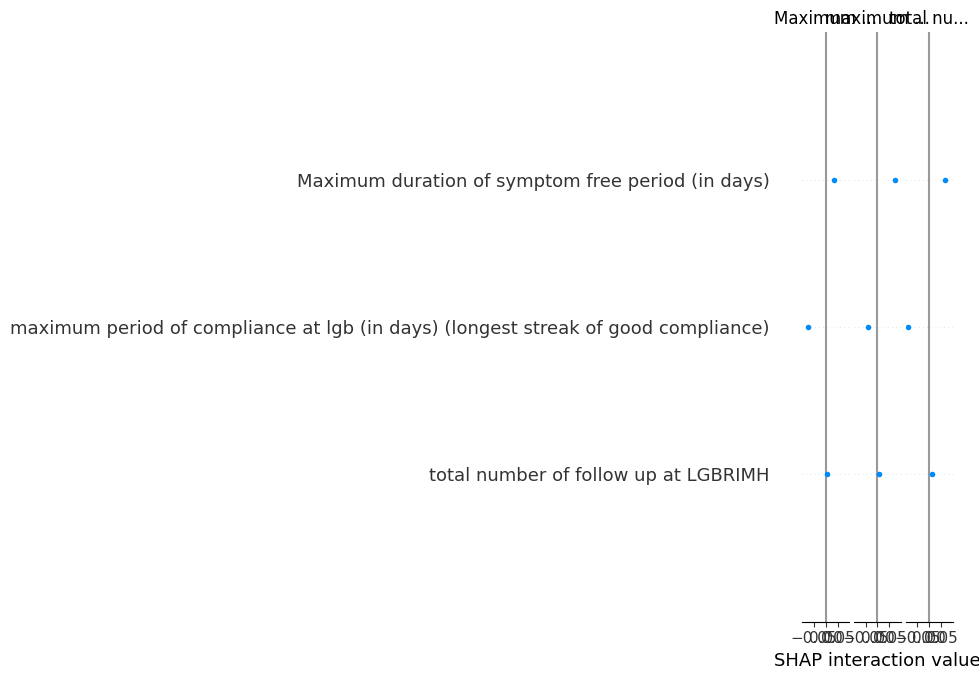



Instance: 27
Original prediction probabilities: [0.5625 0.125  0.3125]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [ 0.08017917 -0.02948965 -0.05068951]
total number of follow up at LGBRIMH: [ 0.05086364 -0.01737754 -0.0334861 ]
Maximum duration of symptom free period (in days): [ 0.0564219  -0.00678006 -0.04964184]
days/freq: [-0.02899163  0.00870168  0.02028996]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.01117204 -0.00421453  0.01538658]
Off-medications duration (to add all such durations over follow-up in days): [-0.01841807 -0.01968537  0.03810343]
Total duration of medication 2(in days) : [-0.00187937 -0.00947846  0.01135782]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [-0.01253236 -0.00280881  0.01534117]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

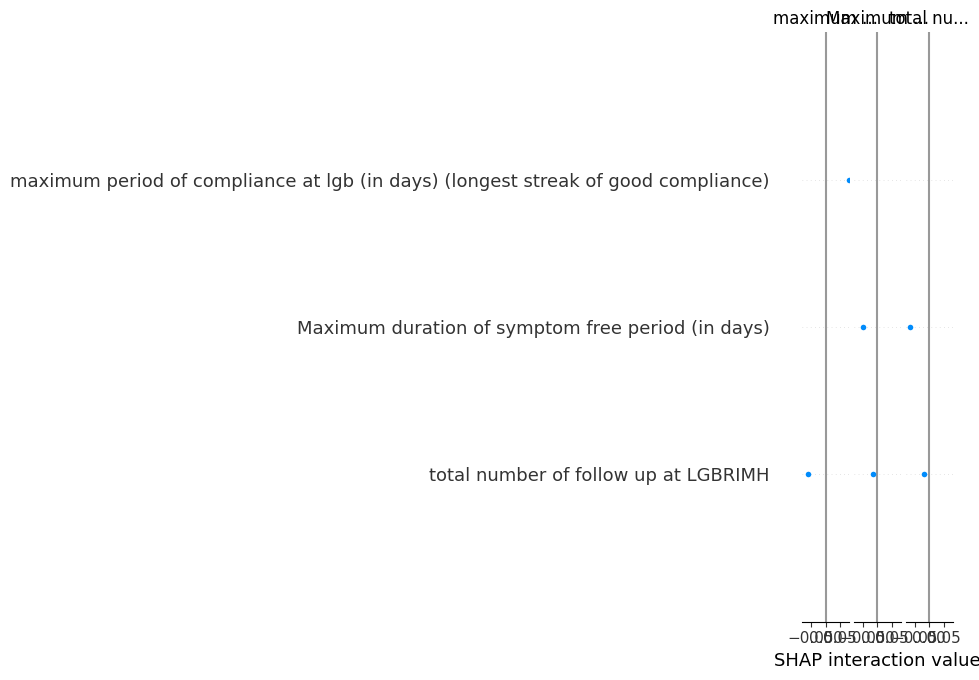



Instance: 28
Original prediction probabilities: [0.325  0.2875 0.3875]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.03501924  0.02664079  0.00837845]
total number of follow up at LGBRIMH: [ 0.01873283 -0.01187164 -0.00686119]
Maximum duration of symptom free period (in days): [ 0.05978413 -0.02228114 -0.037503  ]
days/freq: [-0.0140306   0.00301016  0.01102043]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03100932  0.00250254  0.02850678]
Off-medications duration (to add all such durations over follow-up in days): [-0.04434733  0.0059368   0.03841053]
Total duration of medication 2(in days) : [-0.00083067  0.01008395 -0.00925328]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.04308678 -0.00636718 -0.0367196 ]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

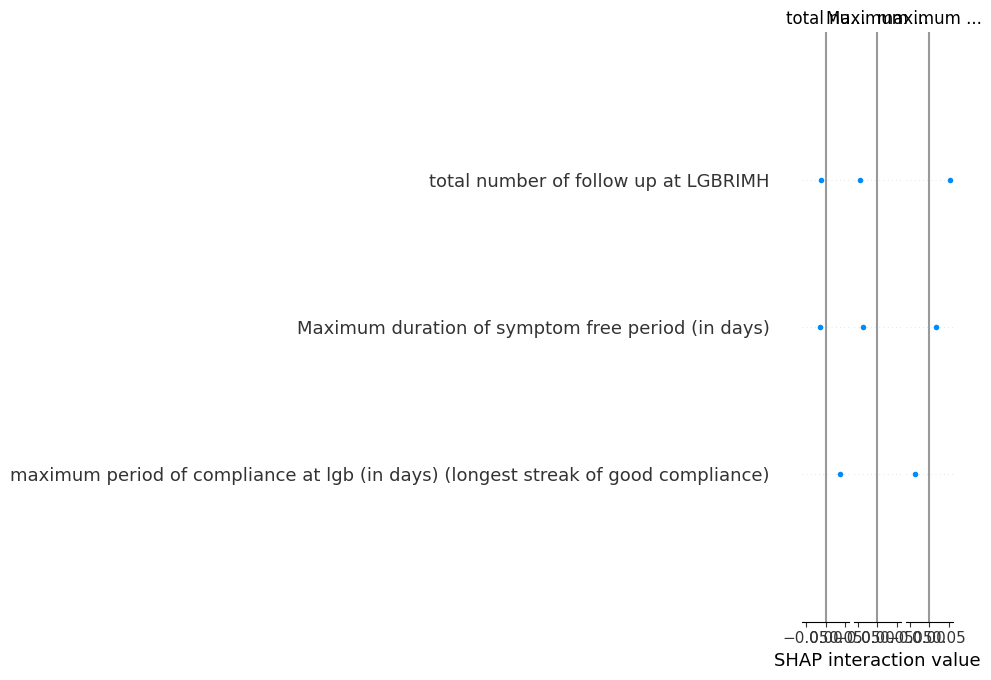



Instance: 29
Original prediction probabilities: [0.3    0.3375 0.3625]
SHAP explanation for the prediction:
maximum period of compliance at lgb (in days) (longest streak of good compliance): [-0.01502303  0.01825384 -0.00323081]
total number of follow up at LGBRIMH: [ 0.04097725 -0.03549637 -0.00548087]
Maximum duration of symptom free period (in days): [-0.02141639  0.02120901  0.00020738]
days/freq: [ 0.07656413 -0.00549359 -0.07107053]
total duration of medication treatment at LGB(in days) (from first consultation to last follow-up): [-0.03122928  0.01128791  0.01994137]
Off-medications duration (to add all such durations over follow-up in days): [-0.02861996  0.0033181   0.02530186]
Total duration of medication 2(in days) : [ 0.00492691 -0.01041236  0.00548545]
mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups): [ 0.03326127  0.00563433 -0.03889559]
Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were tak

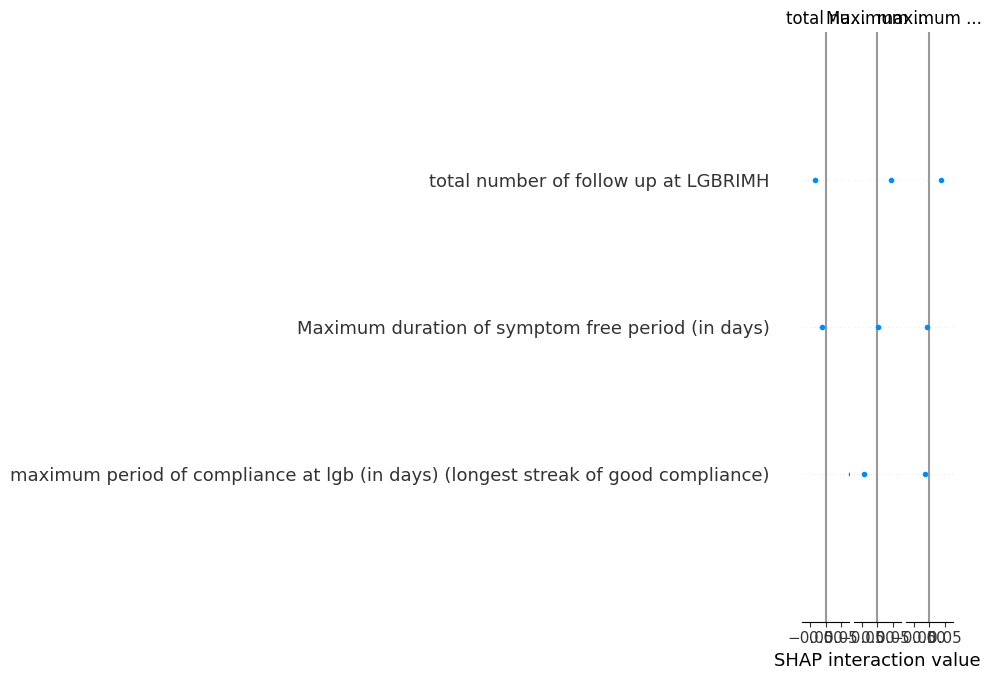

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

X = df4.drop('Final', axis=1)
y = df4['Final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)

results = []

for i in range(len(X_test)):
    instance = X_test.iloc[[i]]
    
    shap_values = explainer.shap_values(instance, check_additivity=False)  # Disable additivity check
    
    if isinstance(shap_values, np.ndarray):
        feature_contributions = shap_values[0]  # Assuming binary classification, adjust accordingly if not binary
    else:
        feature_contributions = shap_values.base_values[0]  # Get base values if not ndarray
    
    for feature, weight in zip(X.columns, feature_contributions):
        results.append({'Instance': i, 'Feature': feature, 'Weight': weight, 'Probability': model.predict_proba(instance)[0]})
        
    print('Instance:', i)
    print('Original prediction probabilities:', model.predict_proba(instance)[0])
    print('SHAP explanation for the prediction:')
    for feature, weight in zip(X.columns, feature_contributions):
        print(f"{feature}: {weight}")
        
    shap.summary_plot(shap_values, instance)
    print('\n')

df_results = pd.DataFrame(results)

final_table = df_results.groupby('Feature').agg({'Weight': 'mean', 'Probability': lambda x: np.mean(np.array(x), axis=0)}).reset_index()
final_table['Rank'] = final_table['Weight'].rank(ascending=False)

print('Final Table:')
print(final_table)


In [42]:
final_table

,Feature,Weight,Probability
0,Age at last follow up,"[0.002345709224337188, 0.0030731127724785237, ...","[0.33291666666666664, 0.26916666666666667, 0.3..."
1,Age at onset(in years),"[-0.00010830326512414305, -0.00039817226532997...","[0.33291666666666664, 0.26916666666666667, 0.3..."
2,Age at presentation (in yrs),"[0.0015352581558943613, -0.0016505217706285539...","[0.33291666666666664, 0.26916666666666667, 0.3..."
3,Continued medication 1/stopped/changed,"[0.00022711305574949655, -0.00164757077369812,...","[0.33291666666666664, 0.26916666666666667, 0.3..."
4,Continued medication 2/stopped/changed,"[0.0020271924133537966, 0.0011772497989565604,...","[0.33291666666666664, 0.26916666666666667, 0.3..."
5,Distance from LGBRIMH (in KM),"[-0.002352876146046991, -0.0001429819641669023...","[0.33291666666666664, 0.26916666666666667, 0.3..."
6,Family environment,"[-0.00025741862936740594, -0.00218812886853464...","[0.33291666666666664, 0.26916666666666667, 0.3..."
7,Follow up diagnosis changed or not (yes/no),"[-0.0005603681416160862, 0.000986861325786672,...","[0.33291666666666664, 0.26916666666666667, 0.3..."
8,Max Duration of resolution of symptoms before ...,"[0.0006949100607578176, 0.0026449480952883387,...","[0.33291666666666664, 0.26916666666666667, 0.3..."
9,Maximum dose of medication 1 (in mg),"[-0.0010069993035869325, 0.001955562350690042,...","[0.33291666666666664, 0.26916666666666667, 0.3..."


In [48]:
final_table['Weight'][0]

array([ 0.00234571,  0.00307311, -0.00541882])

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.090100, while the model output was 0.100000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [49]:
final_table['Final Weight'] = final_table['Weight'].apply(np.mean)

final_table_sorted = final_table.sort_values(by='Final Weight')

print('Final Table (Sorted by Final Weight in Ascending Order):')
print(final_table_sorted)


Final Table (Sorted by Final Weight in Ascending Order):
                                              Feature  \
17                                  School Adjustment   
19          Total duration of medication 1 (in days)    
28                                        total_days1   
5                       Distance from LGBRIMH (in KM)   
20           Total duration of medication 2(in days)    
18  Time period between onset to first consultatio...   
24  mean gap ratio at lgb (total no of months of f...   
13                       No of relapses/exacerbations   
16                                        Rural/Urban   
25                                          outbursts   
22                                          days/freq   
21                                               adhd   
7         Follow up diagnosis changed or not (yes/no)   
15         Response to medication 1 (Good/partial/no)   
29                                     weight (in Kg)   
12  Medication possession ratio

In [50]:
final_table_sorted

,Feature,Weight,Probability,Final Weight
17,School Adjustment,"[0.0019993964311068838, 0.004295618996152241, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",-1.734723e-18
19,Total duration of medication 1 (in days),"[-0.007206658664340379, 0.004869827662946403, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",-1.156482e-18
28,total_days1,"[0.002400543317756485, 0.00433613259932708, -0...","[0.33291666666666664, 0.26916666666666667, 0.3...",-8.673617e-19
5,Distance from LGBRIMH (in KM),"[-0.002352876146046991, -0.0001429819641669023...","[0.33291666666666664, 0.26916666666666667, 0.3...",-7.228014e-19
20,Total duration of medication 2(in days),"[-0.003494836092825578, 0.008086902798168828, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",-5.782412e-19
18,Time period between onset to first consultatio...,"[-0.002033558839925675, -0.0002980199800840835...","[0.33291666666666664, 0.26916666666666667, 0.3...",-2.891206e-19
24,mean gap ratio at lgb (total no of months of f...,"[0.007362972449142374, -0.004247176530845618, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",-2.891206e-19
13,No of relapses/exacerbations,"[0.0035773649833273913, 0.0003313269890437175,...","[0.33291666666666664, 0.26916666666666667, 0.3...",-2.891206e-19
16,Rural/Urban,"[8.213643821520008e-05, 0.0010088492394348526,...","[0.33291666666666664, 0.26916666666666667, 0.3...",-1.445603e-19
25,outbursts,"[-0.00021797493986825523, 0.000380468769240446...","[0.33291666666666664, 0.26916666666666667, 0.3...",-9.035018e-21


In [51]:
final_table_sorted_reversed = final_table_sorted[::-1]

print('Final Table (Reversed):')
print(final_table_sorted_reversed)


Final Table (Reversed):
                                              Feature  \
14  Off-medications duration (to add all such dura...   
27               total number of follow up at LGBRIMH   
23  maximum period of compliance at lgb (in days) ...   
11  Medication possession ratios 1(MPRs) in lgb;x-...   
4              Continued medication 2/stopped/changed   
10  Maximum duration of symptom free period (in days)   
2                        Age at presentation (in yrs)   
26  total duration of medication treatment at LGB(...   
6                                  Family environment   
1                              Age at onset(in years)   
0                               Age at last follow up   
9                Maximum dose of medication 1 (in mg)   
3              Continued medication 1/stopped/changed   
8   Max Duration of resolution of symptoms before ...   
12  Medication possession ratios 2(MPRs) in lgb;x-...   
29                                     weight (in Kg)   
15     

In [52]:
final_table_sorted_reversed

,Feature,Weight,Probability,Final Weight
14,Off-medications duration (to add all such dura...,"[-0.0017361493469976231, 0.003611048386679653,...","[0.33291666666666664, 0.26916666666666667, 0.3...",6.577493e-18
27,total number of follow up at LGBRIMH,"[-0.0033675036678927988, -0.000810355343183752...","[0.33291666666666664, 0.26916666666666667, 0.3...",5.204170e-18
23,maximum period of compliance at lgb (in days) ...,"[-0.007377532936827344, 0.0038302042831461786,...","[0.33291666666666664, 0.26916666666666667, 0.3...",4.192248e-18
11,Medication possession ratios 1(MPRs) in lgb;x-...,"[0.00273543921098768, -0.0014823635663594793, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",2.023844e-18
4,Continued medication 2/stopped/changed,"[0.0020271924133537966, 0.0011772497989565604,...","[0.33291666666666664, 0.26916666666666667, 0.3...",2.023844e-18
10,Maximum duration of symptom free period (in days),"[-0.0015583504484022945, 0.004072689766758958,...","[0.33291666666666664, 0.26916666666666667, 0.3...",1.445603e-18
2,Age at presentation (in yrs),"[0.0015352581558943613, -0.0016505217706285539...","[0.33291666666666664, 0.26916666666666667, 0.3...",9.486769e-19
26,total duration of medication treatment at LGB(...,"[-0.011825300699720853, 0.004393445275513022, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",8.673617e-19
6,Family environment,"[-0.00025741862936740594, -0.00218812886853464...","[0.33291666666666664, 0.26916666666666667, 0.3...",8.673617e-19
1,Age at onset(in years),"[-0.00010830326512414305, -0.00039817226532997...","[0.33291666666666664, 0.26916666666666667, 0.3...",6.143812e-19


In [55]:
feature_list = final_table_sorted_reversed['Feature'].tolist()

print('List of Features:')
print(feature_list)


List of Features:
['Off-medications duration (to add all such durations over follow-up in days)', 'total number of follow up at LGBRIMH', 'maximum period of compliance at lgb (in days) (longest streak of good compliance)', 'Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken divided by summation of total number of days when medications were taken with total off medication period) ', 'Continued medication 2/stopped/changed', 'Maximum duration of symptom free period (in days)', 'Age at presentation (in yrs)', 'total duration of medication treatment at LGB(in days) (from first consultation to last follow-up)', 'Family environment', 'Age at onset(in years)', 'Age at last follow up', 'Maximum dose of medication 1 (in mg)', 'Continued medication 1/stopped/changed', 'Max Duration of resolution of symptoms before recurrence/relapse (in days)', 'Medication possession ratios 2(MPRs) in lgb;x-syrup', 'weight (in Kg)', 'Response to medication 1 (Go

In [56]:
final_table_sorted_reversed['Final Weight']

14    6.577493e-18
27    5.204170e-18
23    4.192248e-18
11    2.023844e-18
4     2.023844e-18
10    1.445603e-18
2     9.486769e-19
26    8.673617e-19
6     8.673617e-19
1     6.143812e-19
0     5.782412e-19
9     5.421011e-19
3     4.336809e-19
8     4.336809e-19
12    2.891206e-19
29    2.891206e-19
15    2.168404e-19
7     1.084202e-19
21    7.228014e-20
22    0.000000e+00
25   -9.035018e-21
16   -1.445603e-19
13   -2.891206e-19
24   -2.891206e-19
18   -2.891206e-19
20   -5.782412e-19
5    -7.228014e-19
28   -8.673617e-19
19   -1.156482e-18
17   -1.734723e-18
Name: Final Weight, dtype: float64

In [57]:
final_table_sorted_reversed = final_table_sorted_reversed.reindex(final_table_sorted_reversed['Final Weight'].abs().sort_values().index)

print('Final Table (Sorted by Absolute Final Weight in Ascending Order):')
print(final_table_sorted_reversed)


Final Table (Sorted by Absolute Final Weight in Ascending Order):
                                              Feature  \
22                                          days/freq   
25                                          outbursts   
21                                               adhd   
7         Follow up diagnosis changed or not (yes/no)   
16                                        Rural/Urban   
15         Response to medication 1 (Good/partial/no)   
12  Medication possession ratios 2(MPRs) in lgb;x-...   
29                                     weight (in Kg)   
13                       No of relapses/exacerbations   
24  mean gap ratio at lgb (total no of months of f...   
18  Time period between onset to first consultatio...   
3              Continued medication 1/stopped/changed   
8   Max Duration of resolution of symptoms before ...   
9                Maximum dose of medication 1 (in mg)   
0                               Age at last follow up   
20           Total dur

Final Shap

In [58]:
final_table_sorted_reversed = final_table_sorted_reversed[::-1]

print('Final Table (Reversed Sorted by Absolute Final Weight in Ascending Order):')
print(final_table_sorted_reversed)

Final Table (Reversed Sorted by Absolute Final Weight in Ascending Order):
                                              Feature  \
14  Off-medications duration (to add all such dura...   
27               total number of follow up at LGBRIMH   
23  maximum period of compliance at lgb (in days) ...   
4              Continued medication 2/stopped/changed   
11  Medication possession ratios 1(MPRs) in lgb;x-...   
17                                  School Adjustment   
10  Maximum duration of symptom free period (in days)   
19          Total duration of medication 1 (in days)    
2                        Age at presentation (in yrs)   
28                                        total_days1   
26  total duration of medication treatment at LGB(...   
6                                  Family environment   
5                       Distance from LGBRIMH (in KM)   
1                              Age at onset(in years)   
20           Total duration of medication 2(in days)    
0            

In [60]:
final_table_sorted_reversed['Final Weight'] = final_table_sorted_reversed['Final Weight'].abs()

print('Modified DataFrame with Absolute Final Weight:')
print(final_table_sorted_reversed)


Modified DataFrame with Absolute Final Weight:
                                              Feature  \
14  Off-medications duration (to add all such dura...   
27               total number of follow up at LGBRIMH   
23  maximum period of compliance at lgb (in days) ...   
4              Continued medication 2/stopped/changed   
11  Medication possession ratios 1(MPRs) in lgb;x-...   
17                                  School Adjustment   
10  Maximum duration of symptom free period (in days)   
19          Total duration of medication 1 (in days)    
2                        Age at presentation (in yrs)   
28                                        total_days1   
26  total duration of medication treatment at LGB(...   
6                                  Family environment   
5                       Distance from LGBRIMH (in KM)   
1                              Age at onset(in years)   
20           Total duration of medication 2(in days)    
0                               Age at la

In [61]:
final_table_sorted_reversed

,Feature,Weight,Probability,Final Weight
14,Off-medications duration (to add all such dura...,"[-0.0017361493469976231, 0.003611048386679653,...","[0.33291666666666664, 0.26916666666666667, 0.3...",6.577493e-18
27,total number of follow up at LGBRIMH,"[-0.0033675036678927988, -0.000810355343183752...","[0.33291666666666664, 0.26916666666666667, 0.3...",5.204170e-18
23,maximum period of compliance at lgb (in days) ...,"[-0.007377532936827344, 0.0038302042831461786,...","[0.33291666666666664, 0.26916666666666667, 0.3...",4.192248e-18
4,Continued medication 2/stopped/changed,"[0.0020271924133537966, 0.0011772497989565604,...","[0.33291666666666664, 0.26916666666666667, 0.3...",2.023844e-18
11,Medication possession ratios 1(MPRs) in lgb;x-...,"[0.00273543921098768, -0.0014823635663594793, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",2.023844e-18
17,School Adjustment,"[0.0019993964311068838, 0.004295618996152241, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",1.734723e-18
10,Maximum duration of symptom free period (in days),"[-0.0015583504484022945, 0.004072689766758958,...","[0.33291666666666664, 0.26916666666666667, 0.3...",1.445603e-18
19,Total duration of medication 1 (in days),"[-0.007206658664340379, 0.004869827662946403, ...","[0.33291666666666664, 0.26916666666666667, 0.3...",1.156482e-18
2,Age at presentation (in yrs),"[0.0015352581558943613, -0.0016505217706285539...","[0.33291666666666664, 0.26916666666666667, 0.3...",9.486769e-19
28,total_days1,"[0.002400543317756485, 0.00433613259932708, -0...","[0.33291666666666664, 0.26916666666666667, 0.3...",8.673617e-19


In [63]:
final_table_sorted_reversed['Feature'].tolist()

['Off-medications duration (to add all such durations over follow-up in days)',
 'total number of follow up at LGBRIMH',
 'maximum period of compliance at lgb (in days) (longest streak of good compliance)',
 'Continued medication 2/stopped/changed',
 'Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken divided by summation of total number of days when medications were taken with total off medication period) ',
 'School Adjustment',
 'Maximum duration of symptom free period (in days)',
 'Total duration of medication 1 (in days) ',
 'Age at presentation (in yrs)',
 'total_days1',
 'total duration of medication treatment at LGB(in days) (from first consultation to last follow-up)',
 'Family environment',
 'Distance from LGBRIMH (in KM)',
 'Age at onset(in years)',
 'Total duration of medication 2(in days) ',
 'Age at last follow up',
 'Maximum dose of medication 1 (in mg)',
 'Max Duration of resolution of symptoms before recurrence/relapse

In [64]:
final_table_sorted_reversed['Final Weight']

14    6.577493e-18
27    5.204170e-18
23    4.192248e-18
4     2.023844e-18
11    2.023844e-18
17    1.734723e-18
10    1.445603e-18
19    1.156482e-18
2     9.486769e-19
28    8.673617e-19
26    8.673617e-19
6     8.673617e-19
5     7.228014e-19
1     6.143812e-19
20    5.782412e-19
0     5.782412e-19
9     5.421011e-19
8     4.336809e-19
3     4.336809e-19
18    2.891206e-19
24    2.891206e-19
13    2.891206e-19
29    2.891206e-19
12    2.891206e-19
15    2.168404e-19
16    1.445603e-19
7     1.084202e-19
21    7.228014e-20
25    9.035018e-21
22    0.000000e+00
Name: Final Weight, dtype: float64